# Check for spikes in salinity data:
    
1. plot median 
2. plot ± 10 from median
3. plot median ± 1std

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, YearLocator
import xarray as xr
import cmocean as cm
import marineHeatWaves as mhw
from datetime import date
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
file_name = "data/Rockall-Trough-Mooring-Time-Series-2020.nc"
ds = xr.open_dataset(file_name)

ds.coords['DEPTH'] = ds.PRES

ds['TG_EAST_C'] = ds.TG_EAST-273.15
ds.TG_EAST_C.attrs = ds.TG_EAST.attrs 
ds.TG_EAST_C.attrs['units'] = 'degC'
ds.TG_EAST_C.attrs

ds['TG_WEST_C'] = ds.TG_WEST-273.15
ds.TG_WEST_C.attrs = ds.TG_WEST.attrs 
ds.TG_WEST_C.attrs['units'] = 'degC'
ds.TG_WEST_C.attrs;

In [4]:
file_name = "data/rteb1_test2017_12h.nc"
dseb_17_12h = xr.open_dataset(file_name)

In [5]:
file_name = "data/rteb1_all_merged_new.nc"
dseb = xr.open_dataset(file_name)

dseb_14 = dseb.sel(time = slice ('2014-07-18','2015-06-20'))
dseb_16 = dseb.sel(time = slice ('2016-07-03','2017-05-12'))
dseb_17 = dseb.sel(time = slice ('2017-05-13','2018-07-07'))

In [6]:
file_name = "data/rtwb1_all_merged_new.nc"
dswb1_16 = xr.open_dataset(file_name)

dswb1_16 = dswb1_16.sel(time = slice ('2016-07-04','2017-05-10'))

In [7]:
file_name = "data/rtwb2_all_merged_new.nc"
dswb2_18 = xr.open_dataset(file_name)

dswb2_18 = dswb2_18.sel(time = slice ('2018-07-09','2020-10-14'))

In [8]:
depth_eb = np.array(dseb.depth)
depth_wb1 = np.array(dswb1_16.depth)
depth_wb2 = np.array(dswb2_18.depth)


## Salinity EB 2017 12h

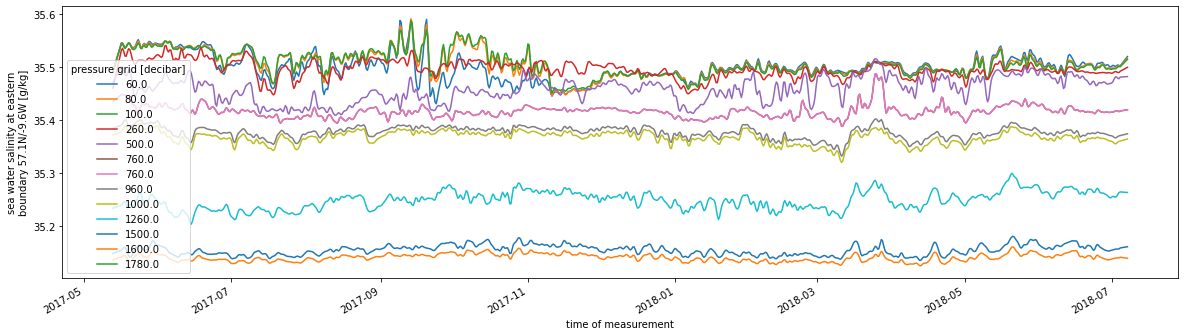

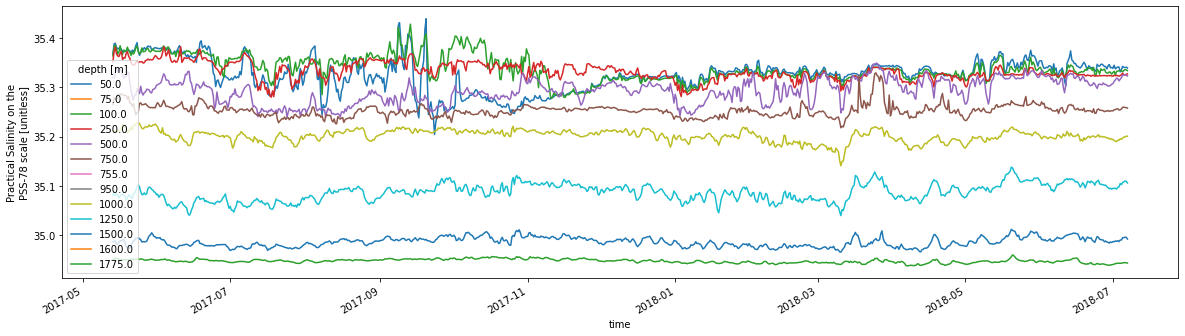

In [9]:
ds.SG_EAST.sel(DEPTH = [50, 75, 100, 250, 500, 750, 755, 950, 1000, 1250, 1500, 1600, 1775], method='nearest').sel(TIME = slice ("2017-05-13", "2018-07-07")).plot.line(x='TIME', figsize =(20,5))
dseb_17_12h.sal.plot.line(x='time', figsize=(20,5));

In [10]:
SA_md = dseb_17_12h.sal.median('time')
SA_std = dseb_17_12h.sal.std('time')

sal, med_brd = xr.broadcast(dseb_17_12h.sal,SA_md)

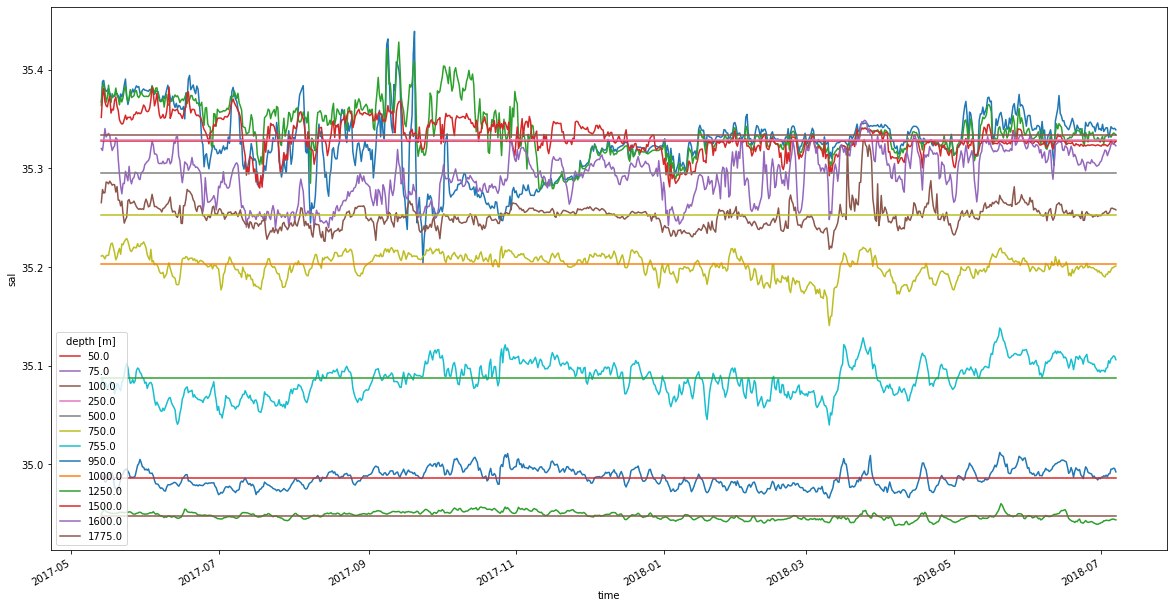

In [11]:
dseb_17_12h.sal.plot.line(x='time', figsize=(20,10));
med_brd.plot.line(x='time');

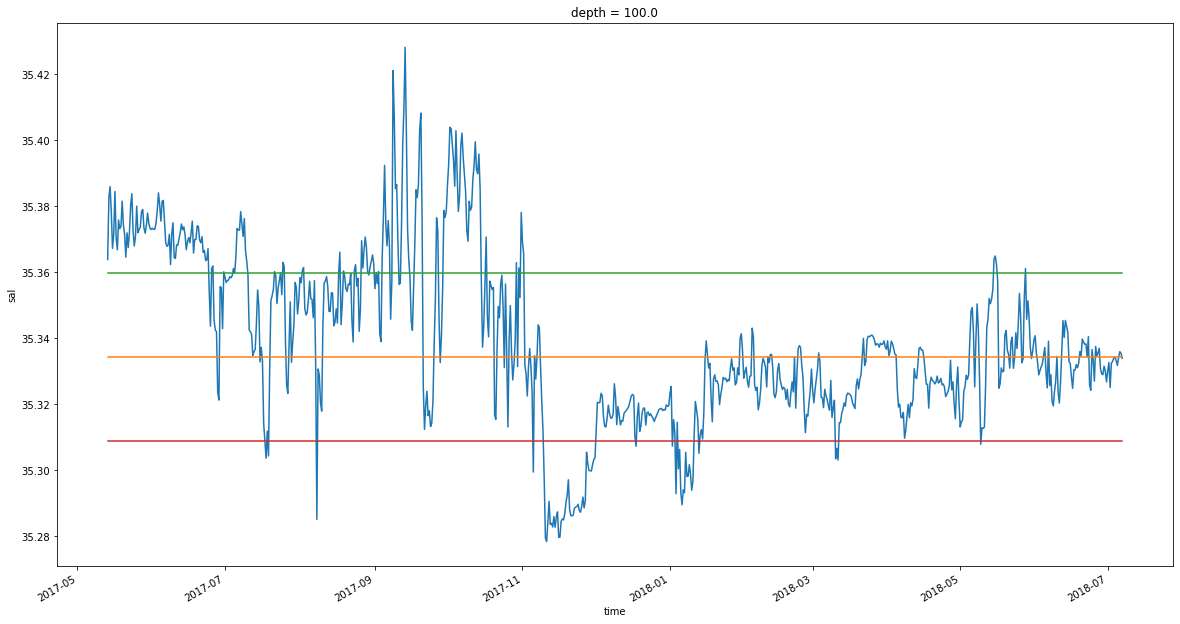

In [12]:
dseb_17_12h.sal.sel(depth=100).plot.line(x='time', figsize=(20,10));
med_brd.sel(depth=100).plot.line(x='time');
(med_brd+SA_std).sel(depth=100).plot.line(x='time');
(med_brd-SA_std).sel(depth=100).plot.line(x='time');

## Salinity EB 2014

In [13]:
SA_md = dseb_14.sal.median('time')
SA_std = dseb_14.sal.std('time')

sal, med_brd = xr.broadcast(dseb_14.sal,SA_md)

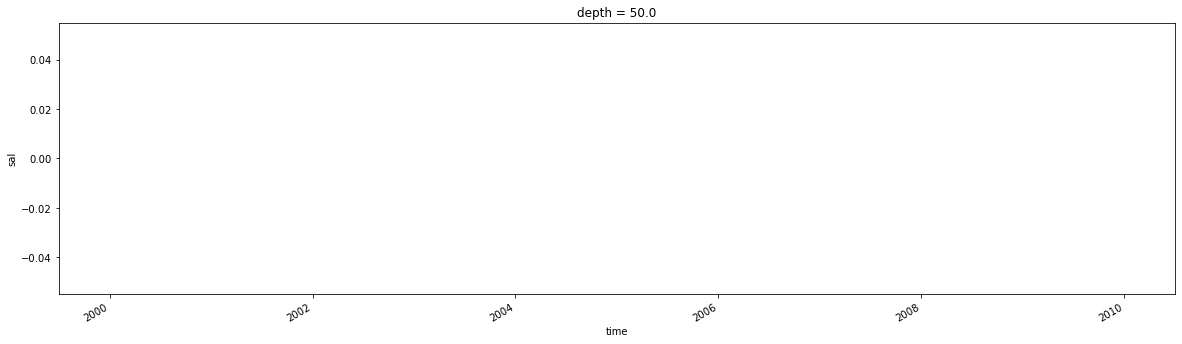

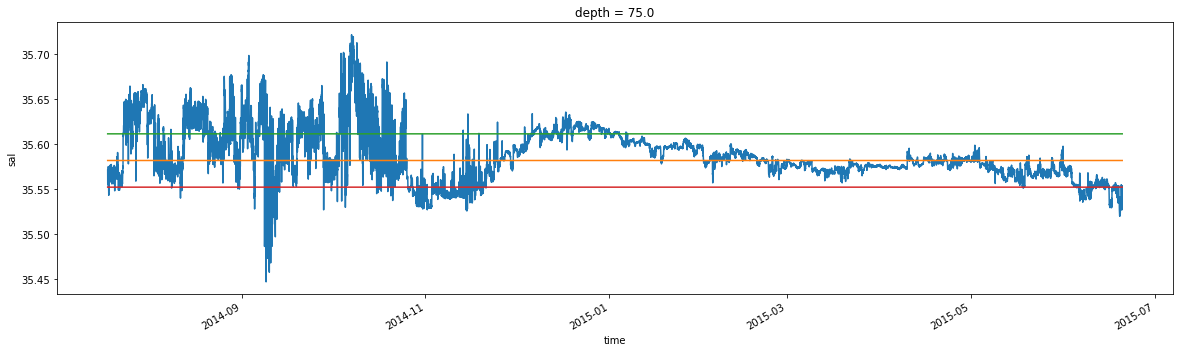

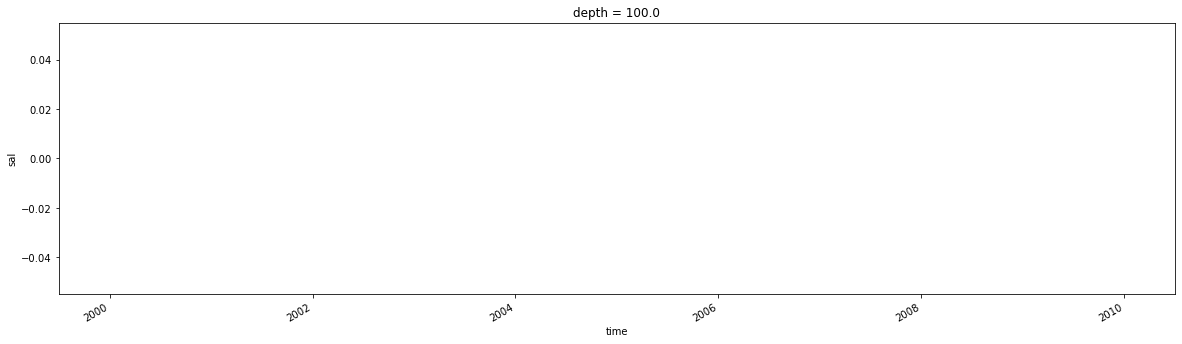

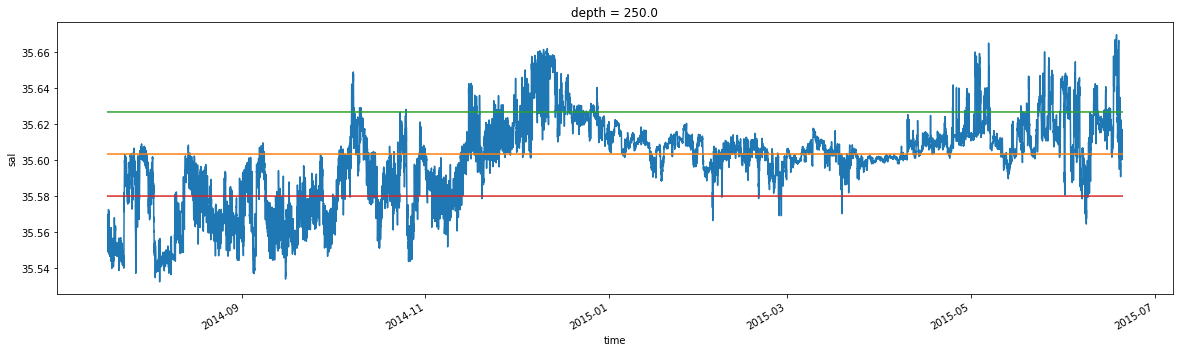

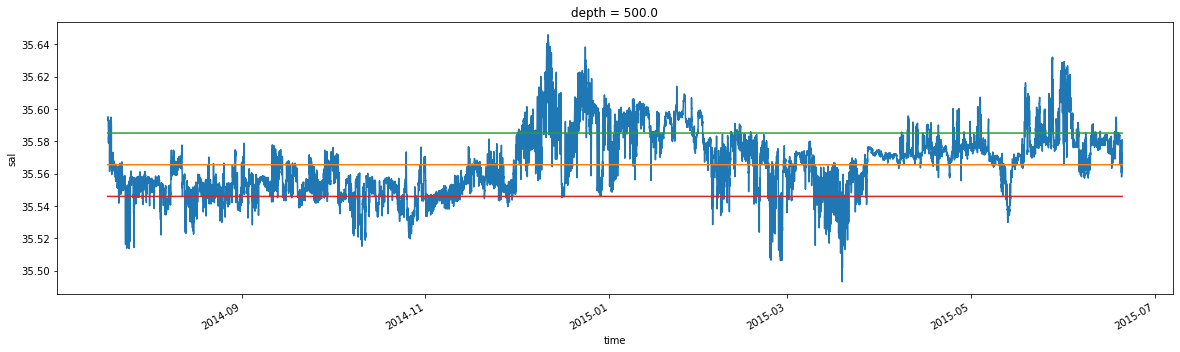

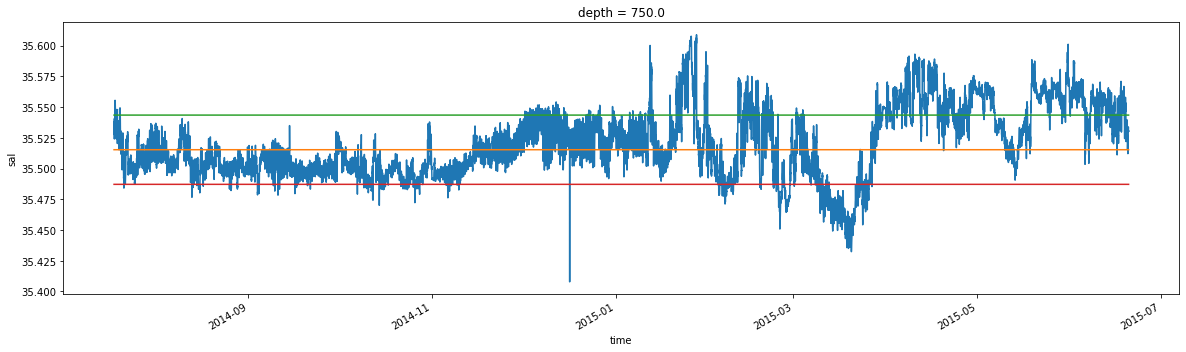

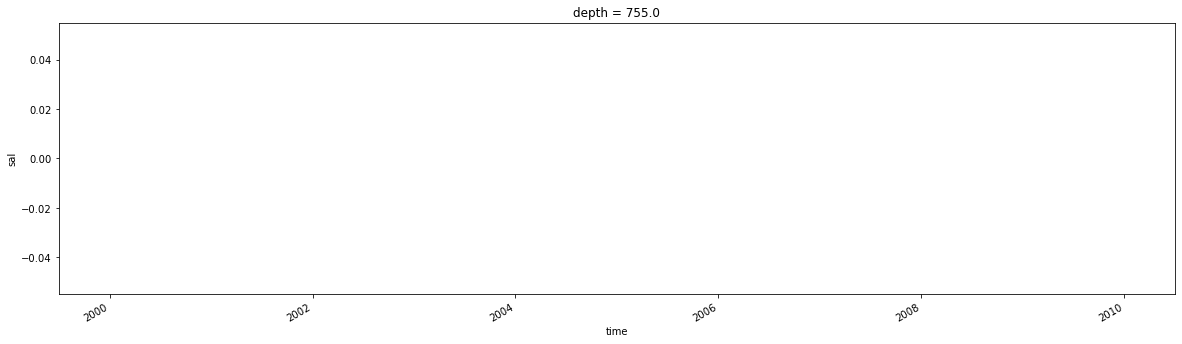

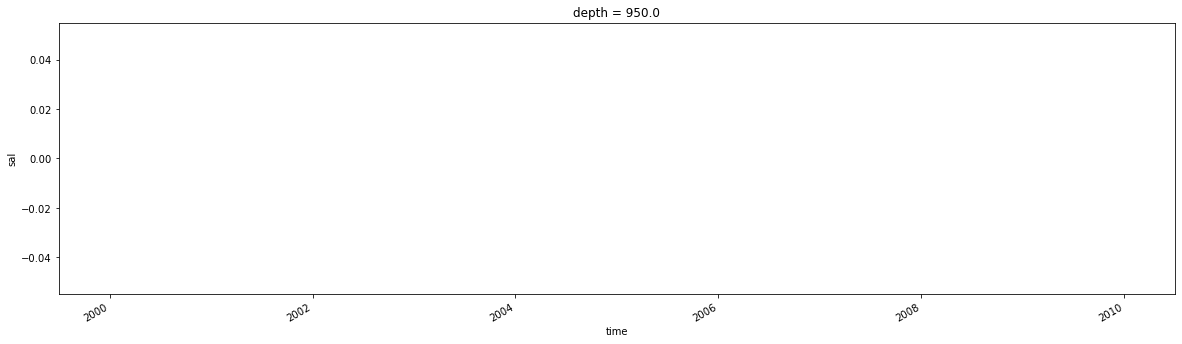

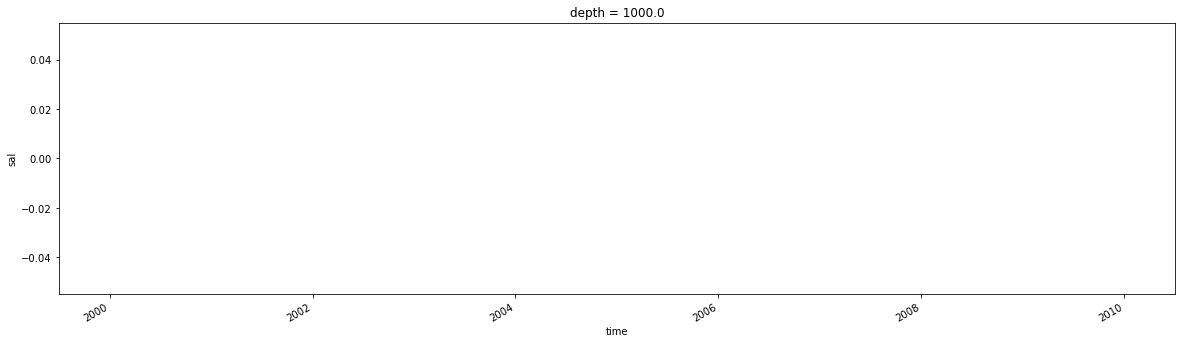

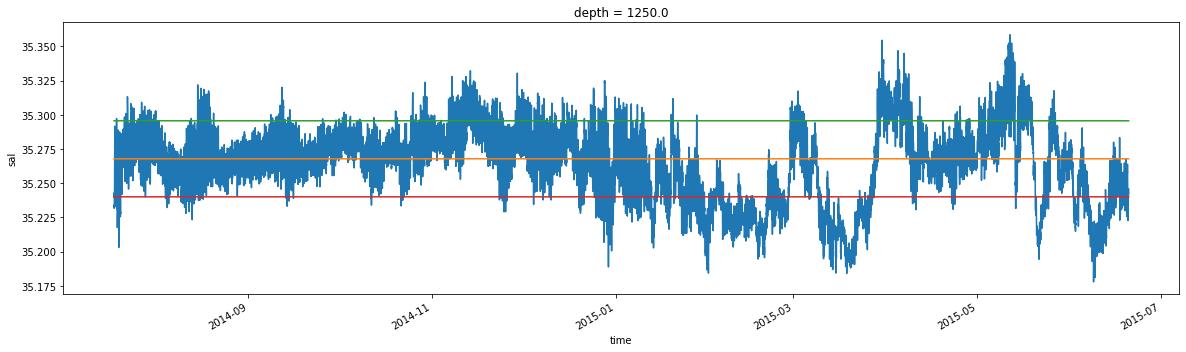

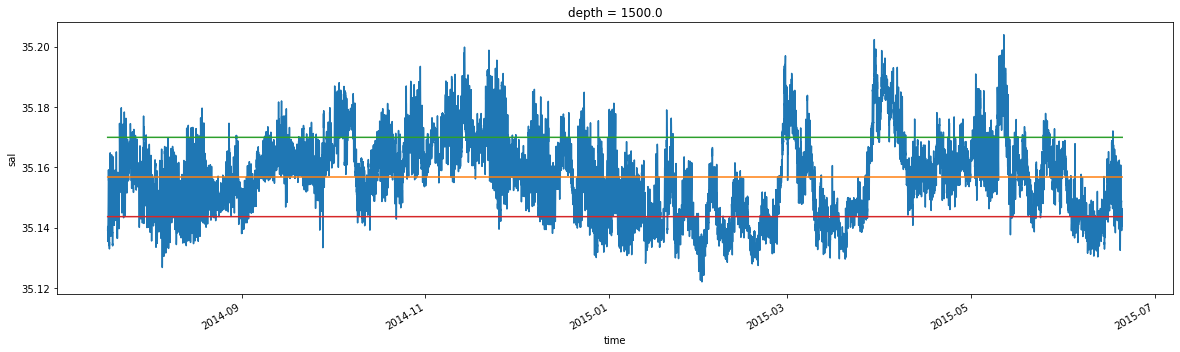

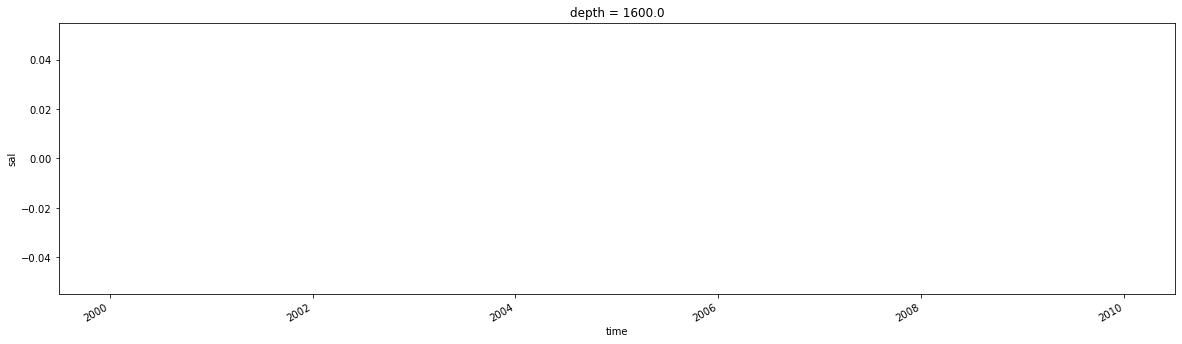

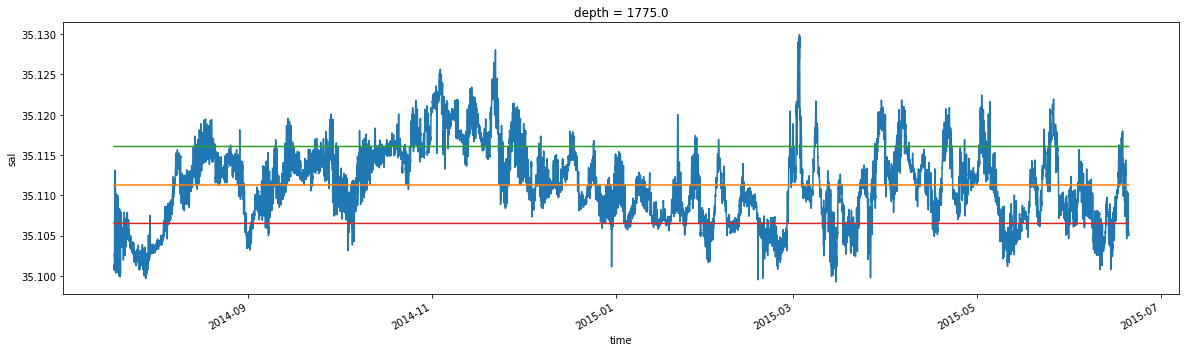

In [14]:
for n in depth_eb:  
    dseb_14.sal.sel(depth=n).plot.line(x='time', figsize=(20,5));
    med_brd.sel(depth=n).plot.line(x='time');
    (med_brd+SA_std).sel(depth=n).plot.line(x='time');
    (med_brd-SA_std).sel(depth=n).plot.line(x='time');

## Salinity EB 2016

In [15]:
SA_md = dseb_16.sal.median('time')
SA_std = dseb_16.sal.std('time')

sal, med_brd = xr.broadcast(dseb_16.sal,SA_md)

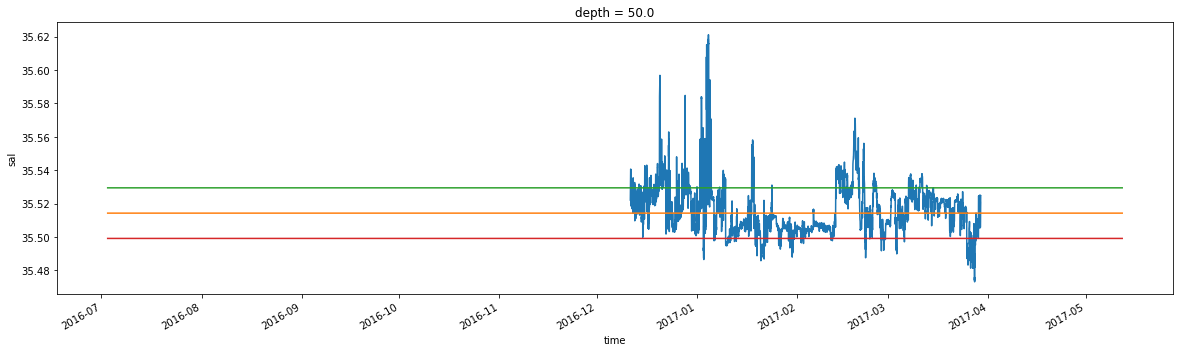

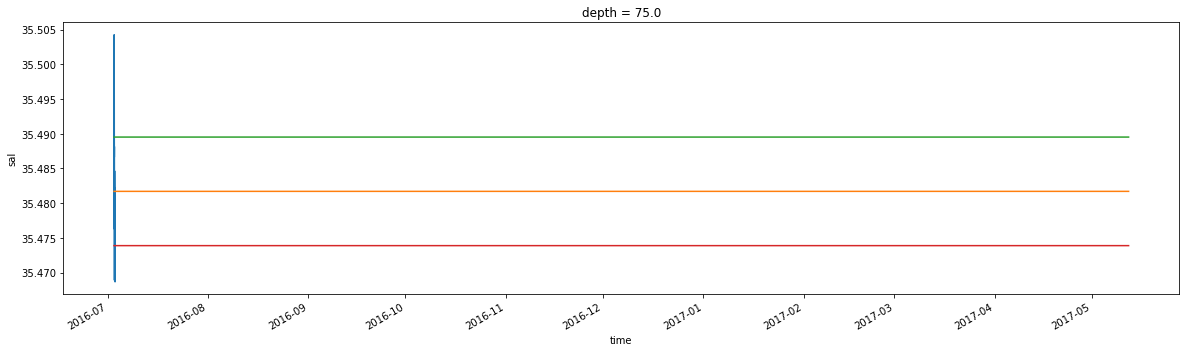

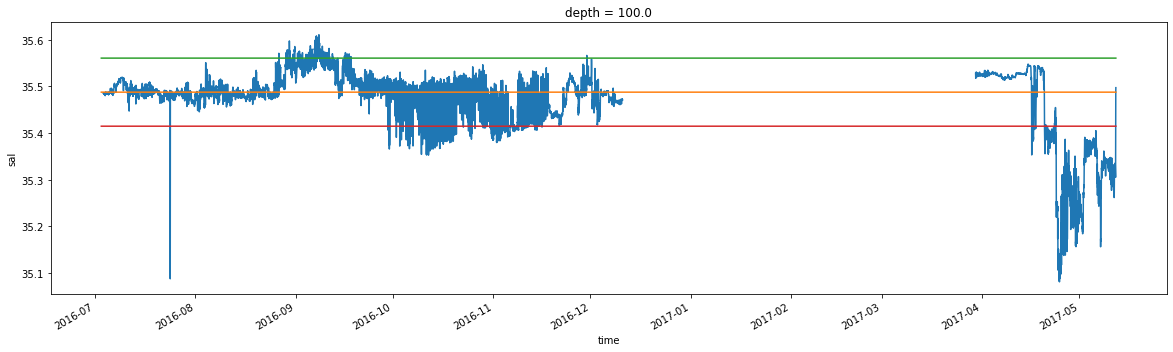

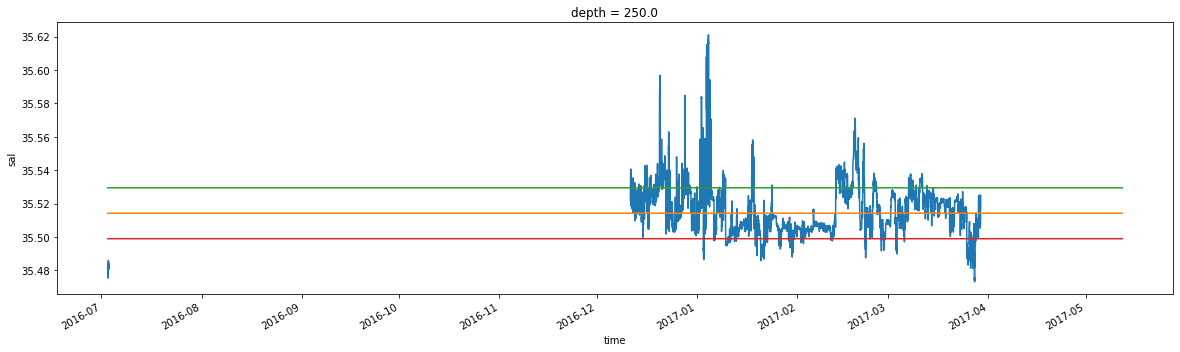

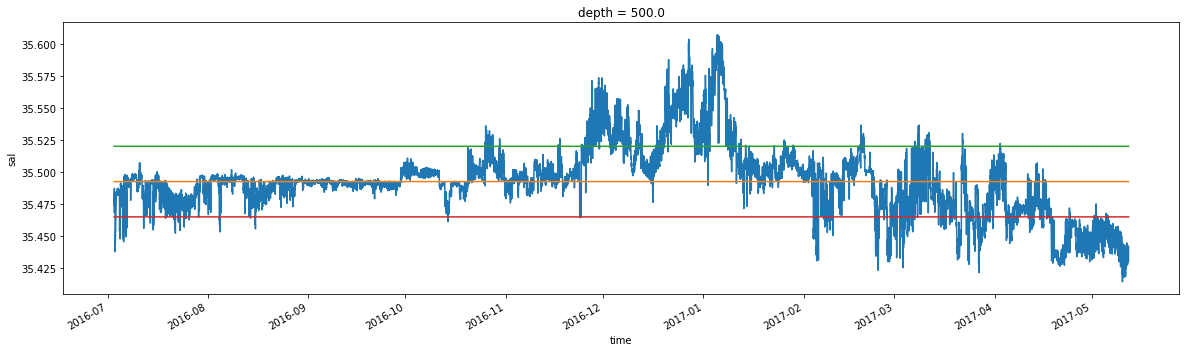

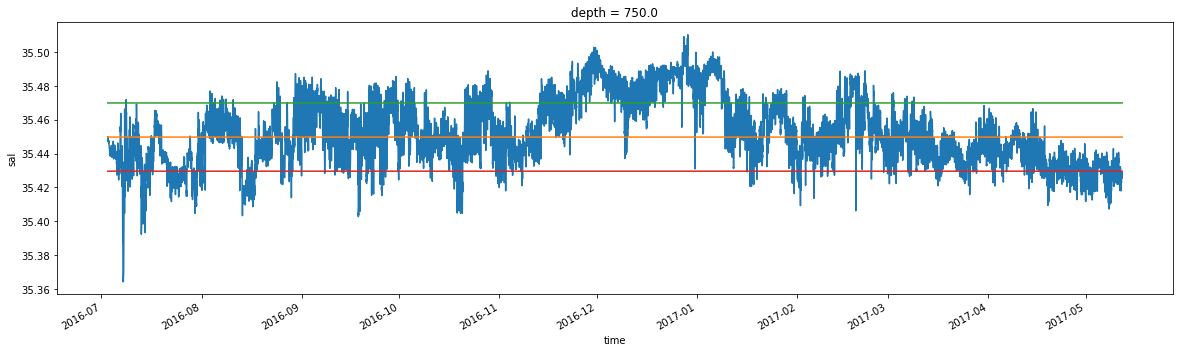

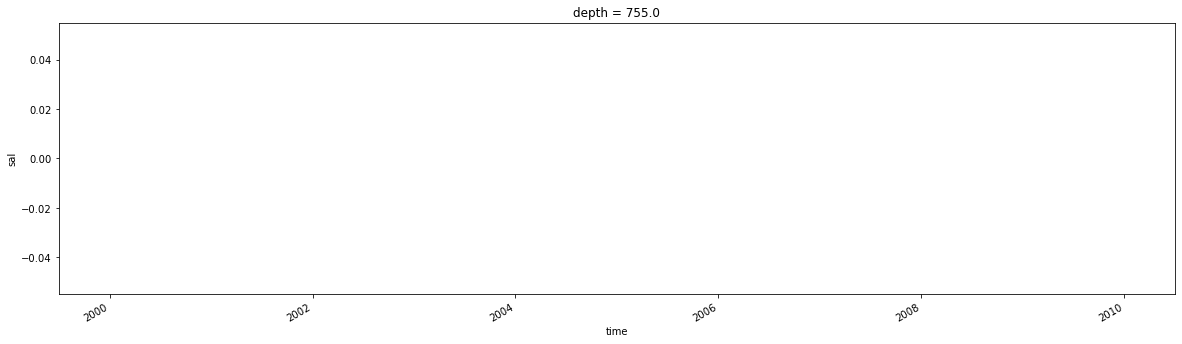

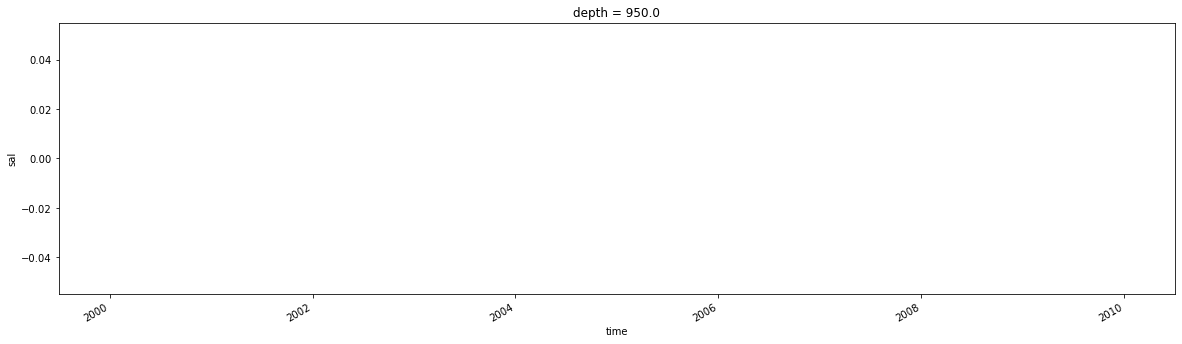

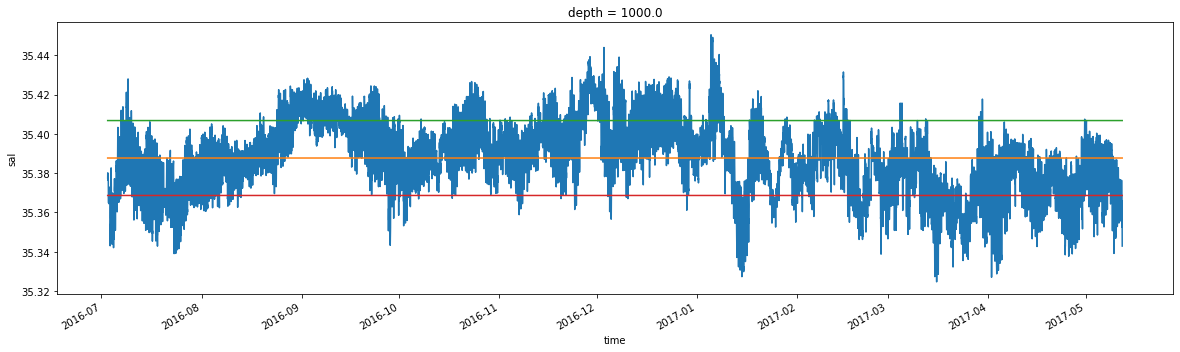

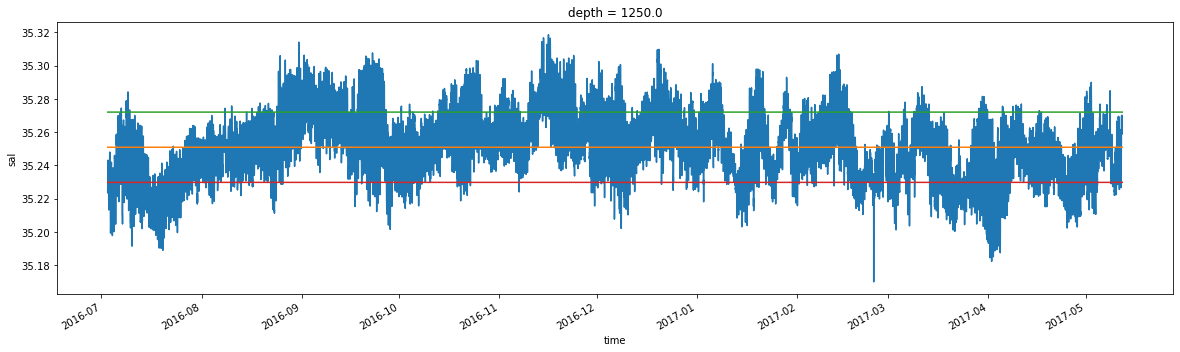

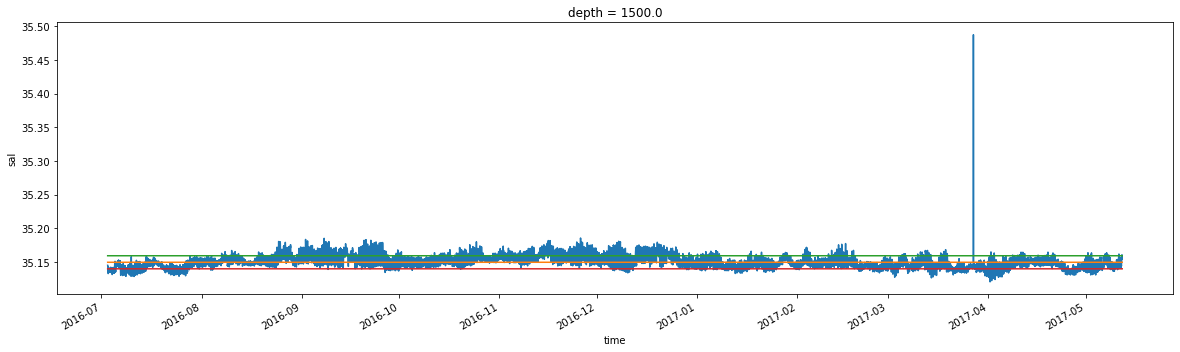

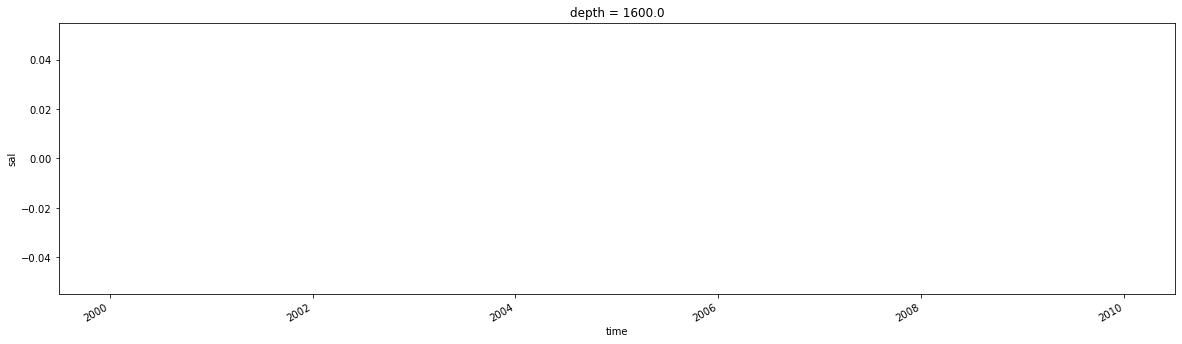

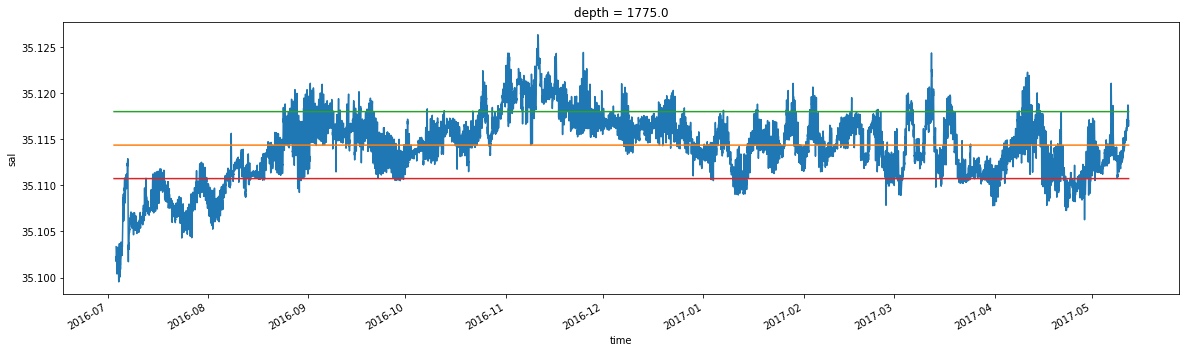

In [16]:
for n in depth_eb:
    dseb_16.sal.sel(depth=n).plot.line(x='time', figsize=(20,5));
    med_brd.sel(depth=n).plot.line(x='time');
    (med_brd+SA_std).sel(depth=n).plot.line(x='time');
    (med_brd-SA_std).sel(depth=n).plot.line(x='time');

## Temperature EB 2016

In [17]:
CT_md = dseb_16.temp.median('time')
CT_std = dseb_16.temp.std('time')

temp, med_brd = xr.broadcast(dseb_16.temp,CT_md)

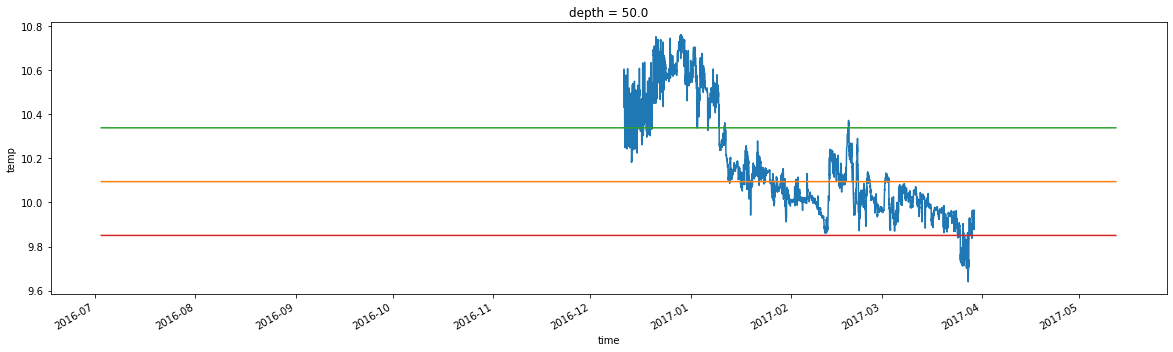

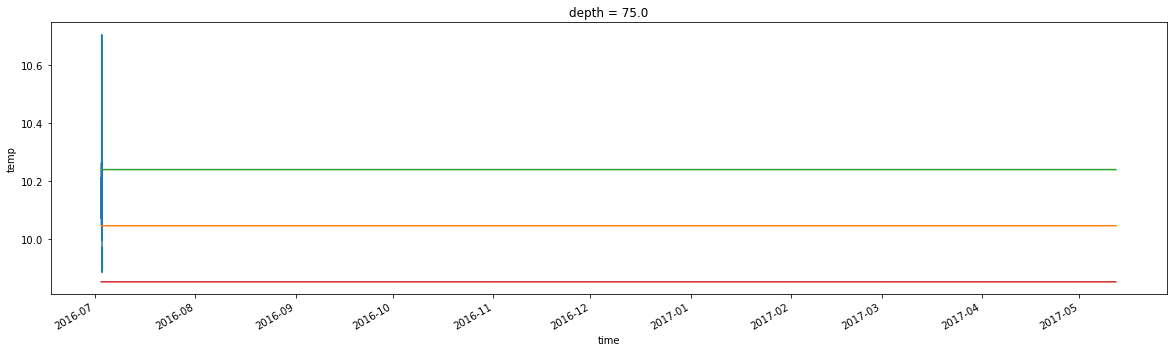

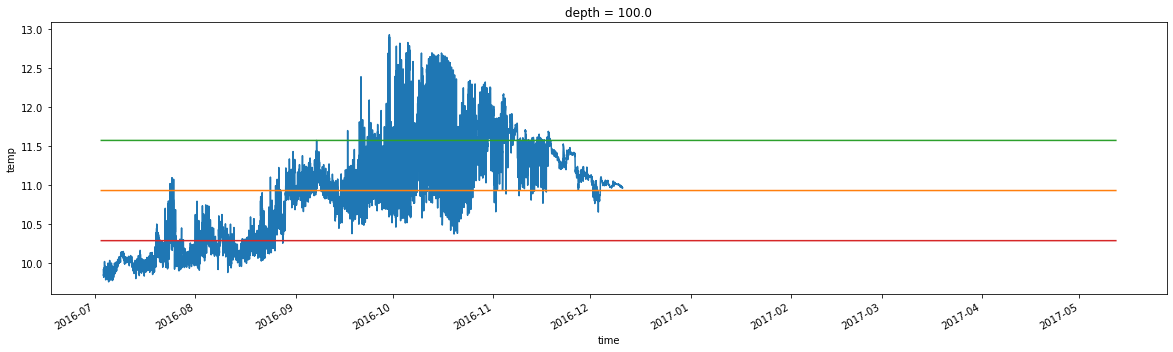

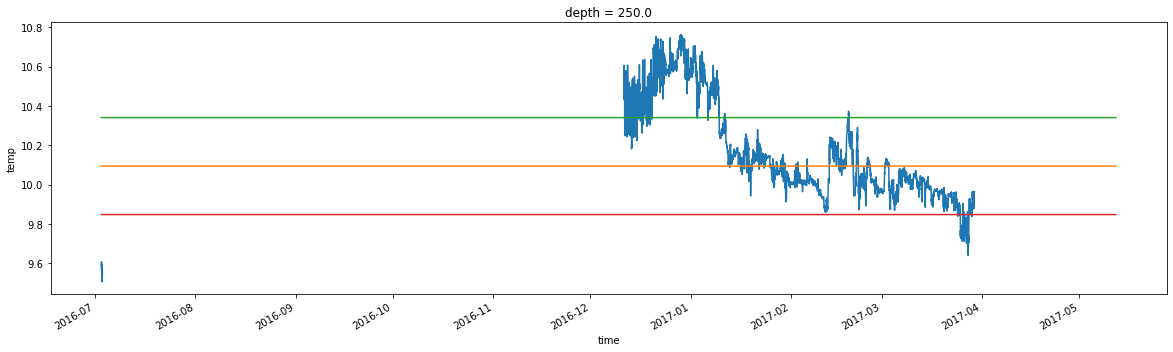

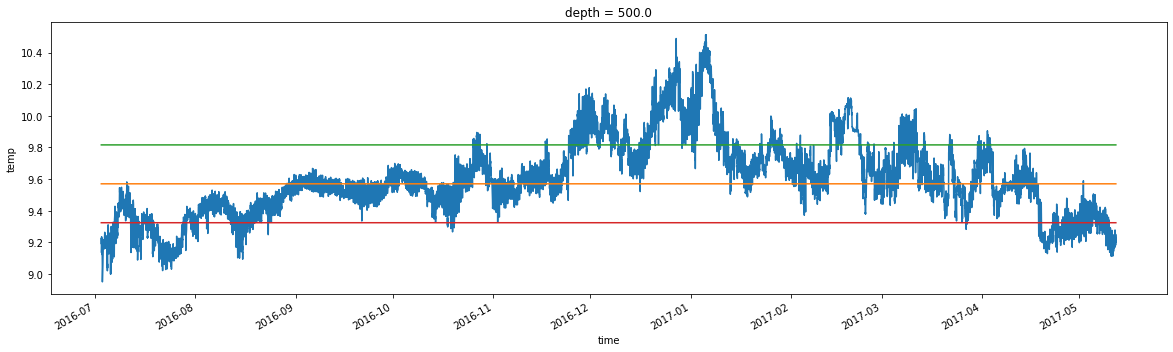

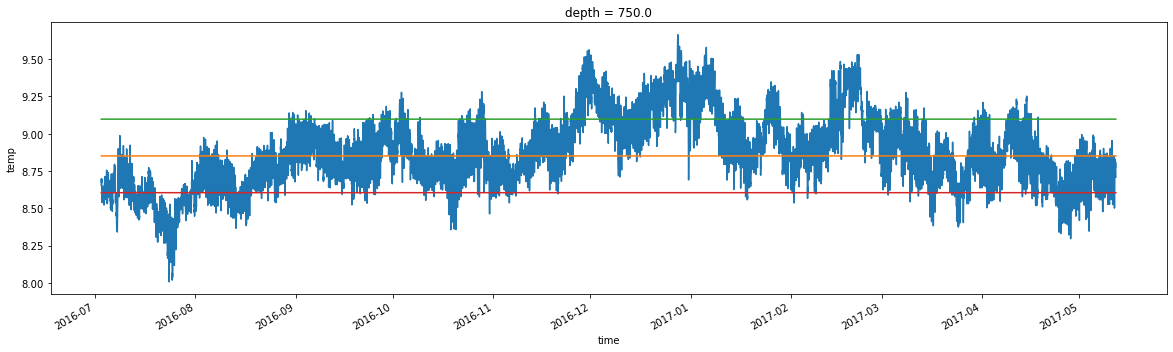

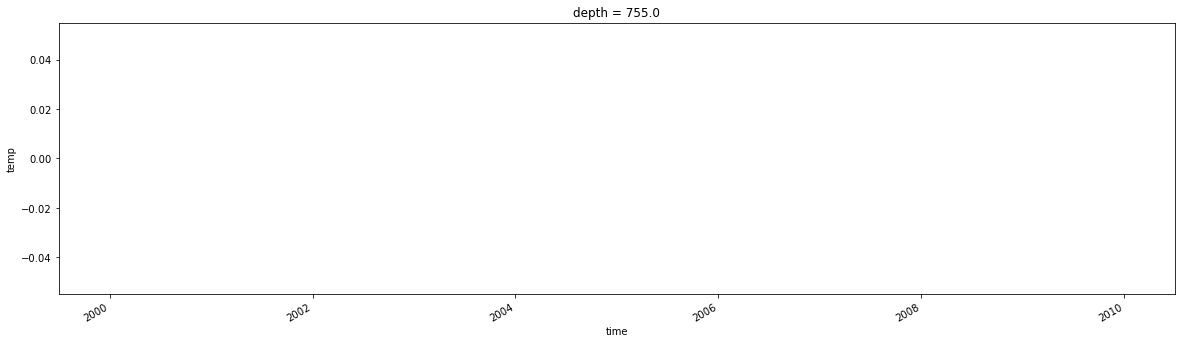

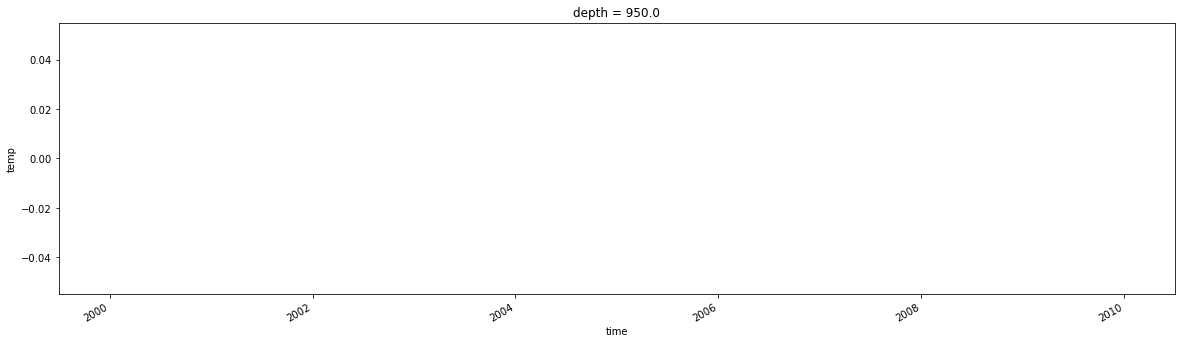

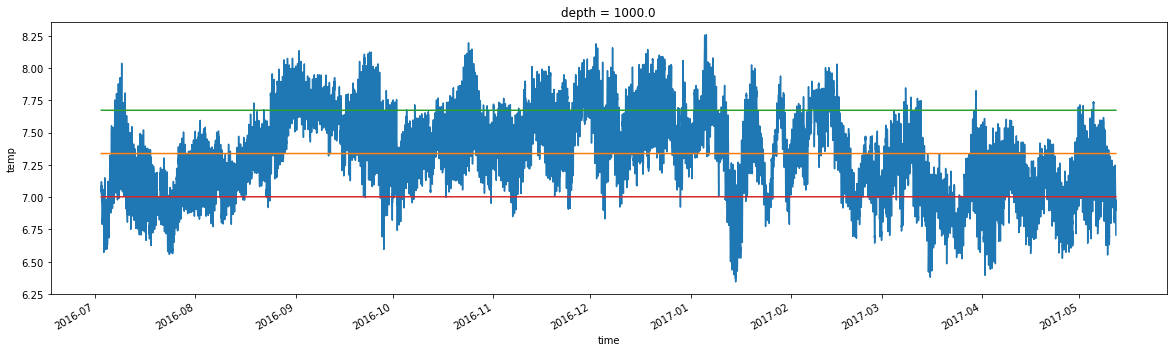

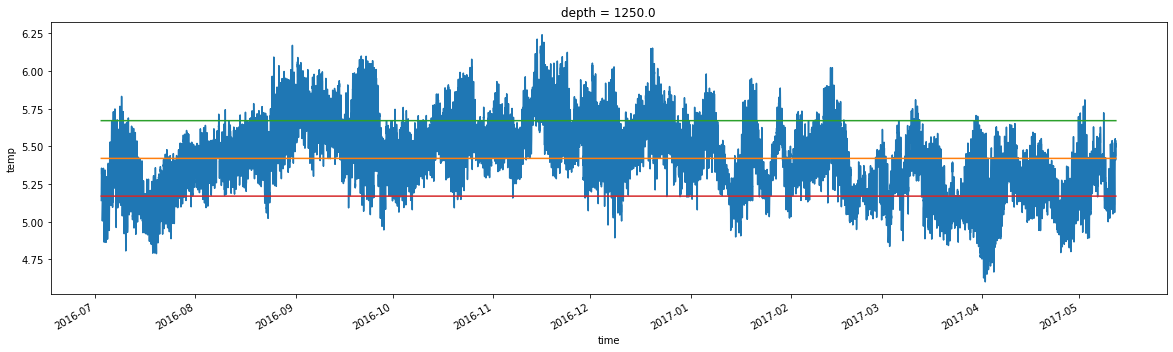

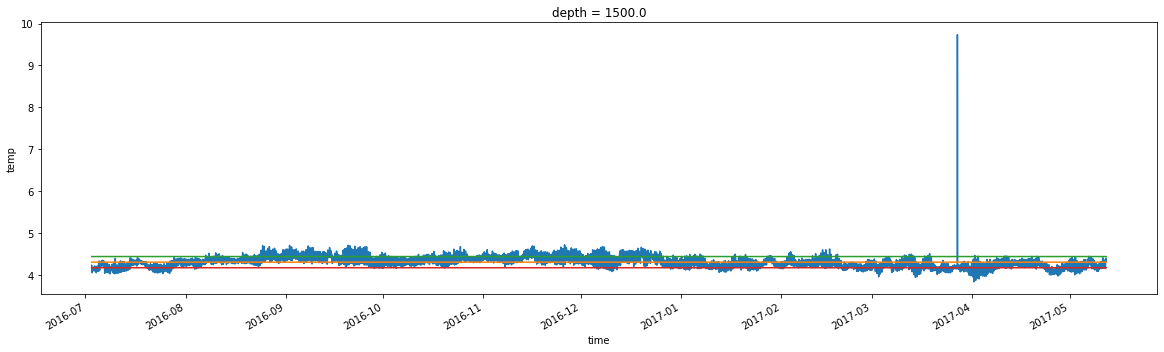

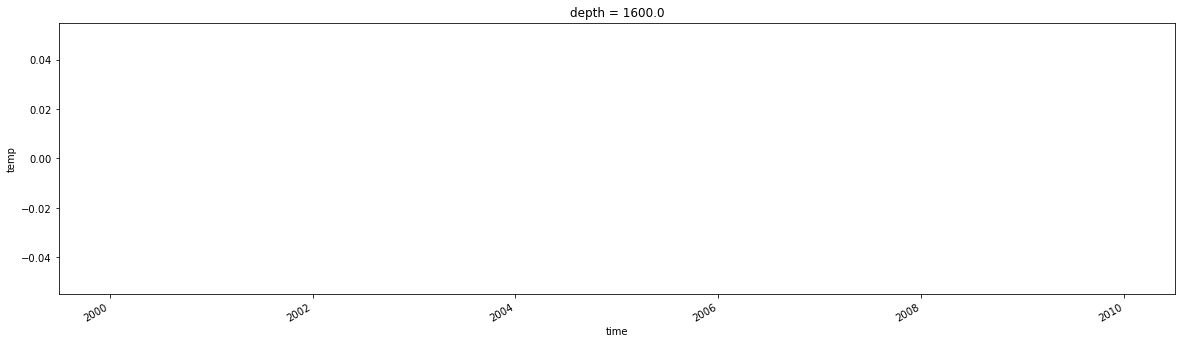

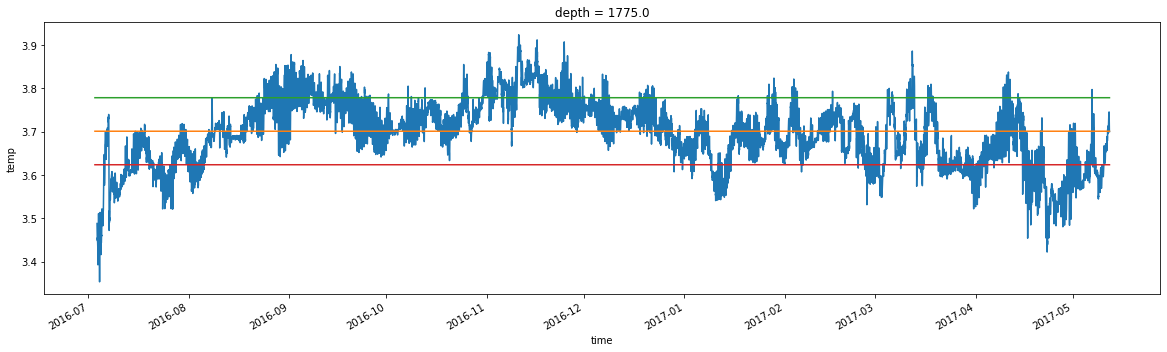

In [18]:
for n in depth_eb:
    dseb_16.temp.sel(depth=n).plot.line(x='time', figsize=(20,5));
    med_brd.sel(depth=n).plot.line(x='time');
    (med_brd+CT_std).sel(depth=n).plot.line(x='time');
    (med_brd-CT_std).sel(depth=n).plot.line(x='time');

## Salinity EB 2017

In [19]:
SA_md = dseb_17.sal.median('time')
SA_std = dseb_17.sal.std('time')

sal, med_brd = xr.broadcast(dseb_17.sal,SA_md)

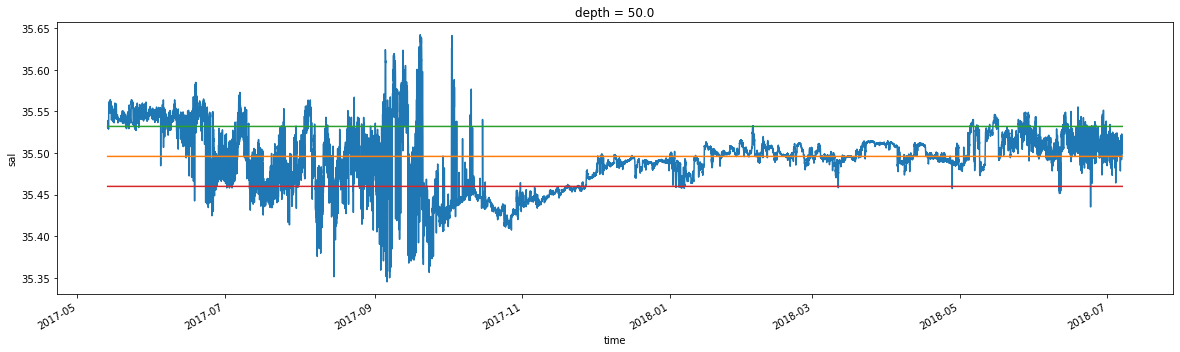

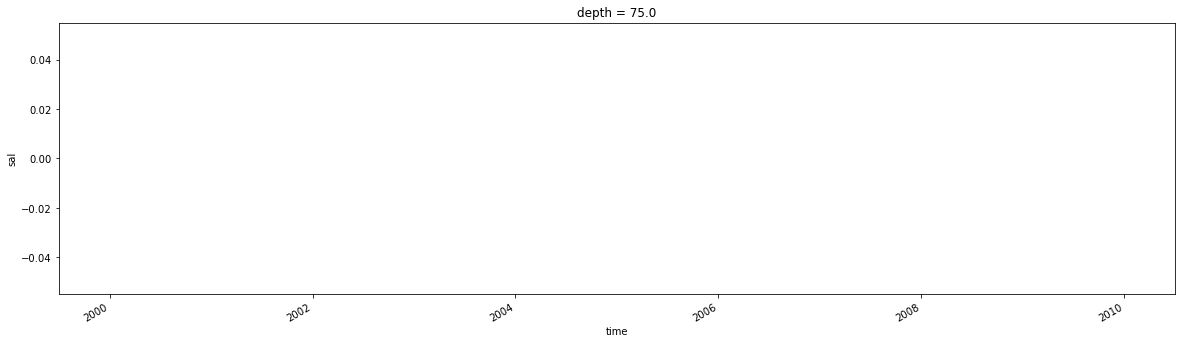

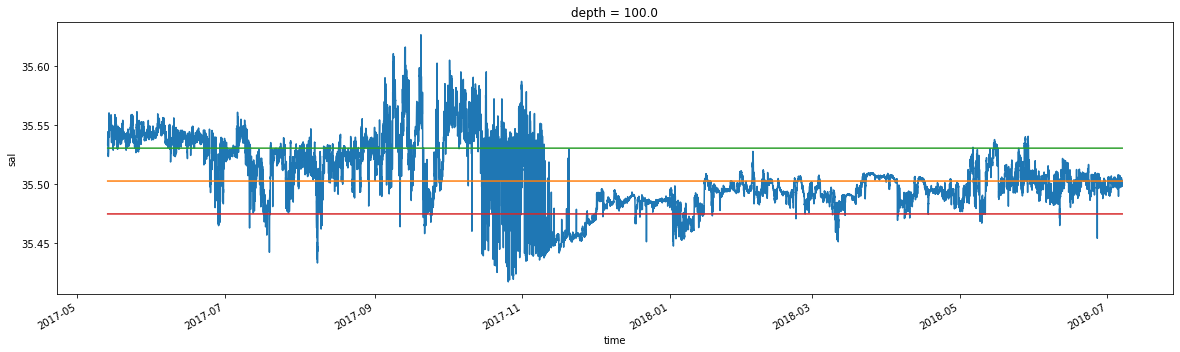

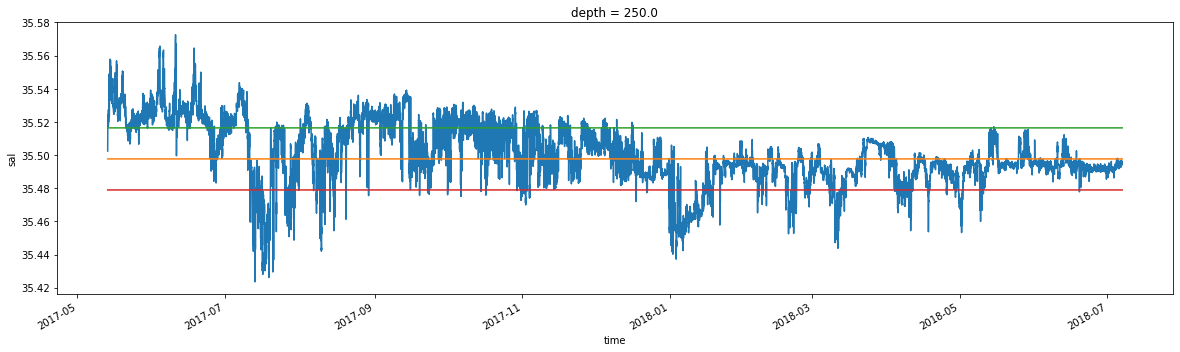

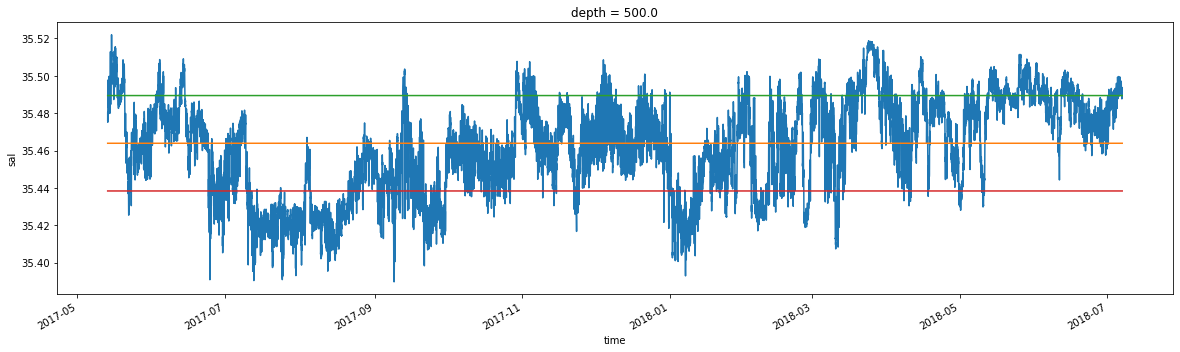

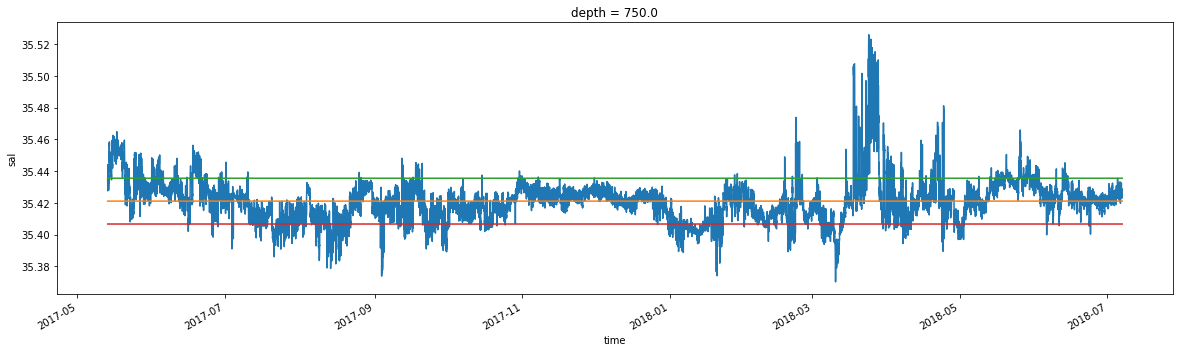

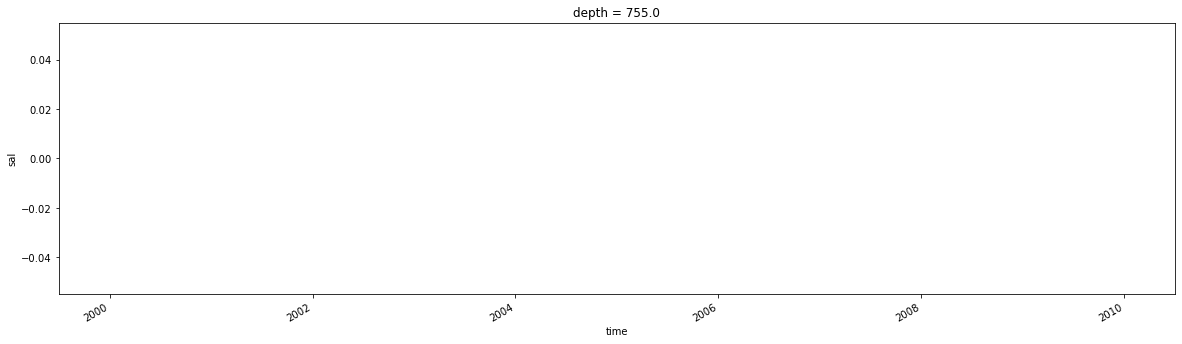

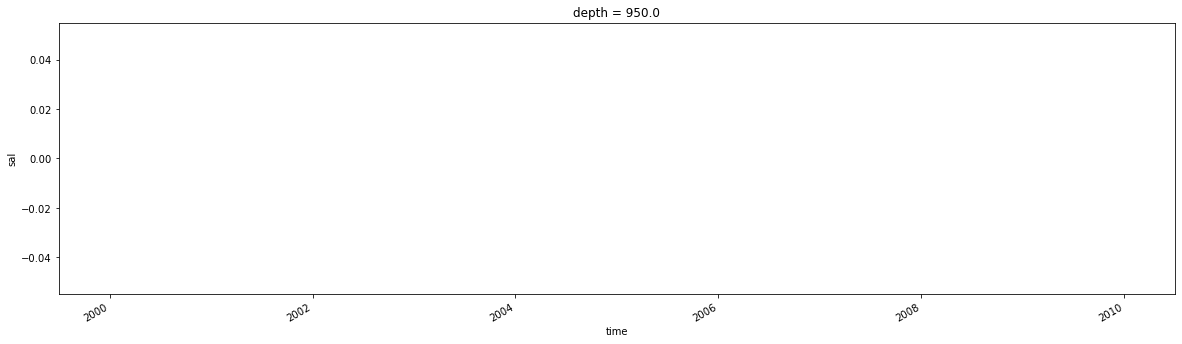

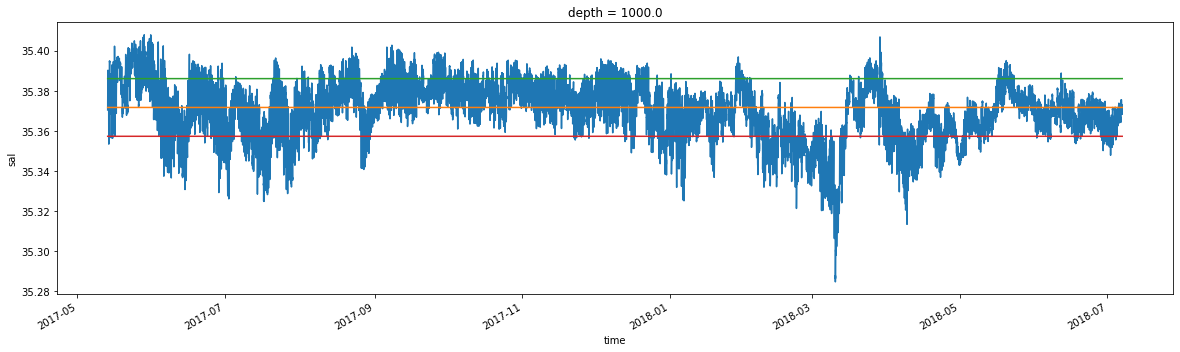

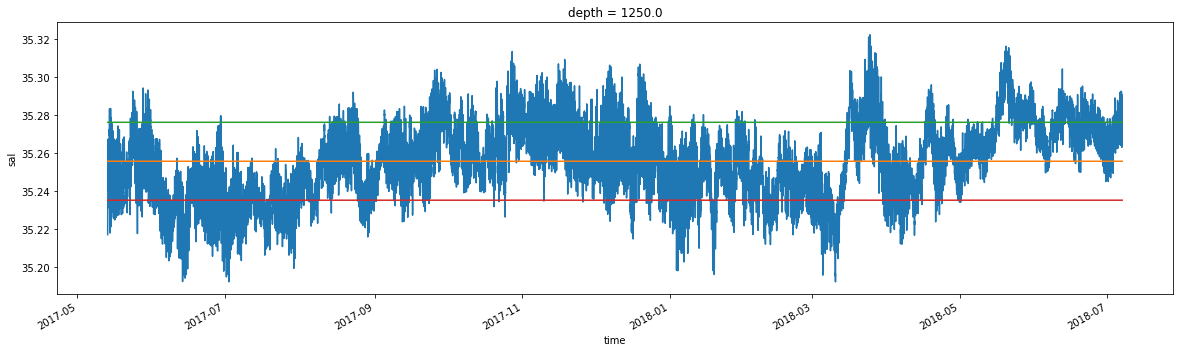

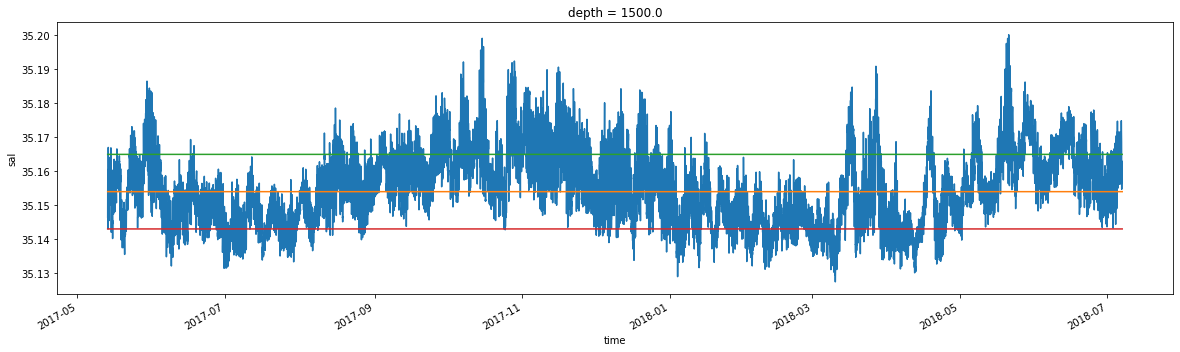

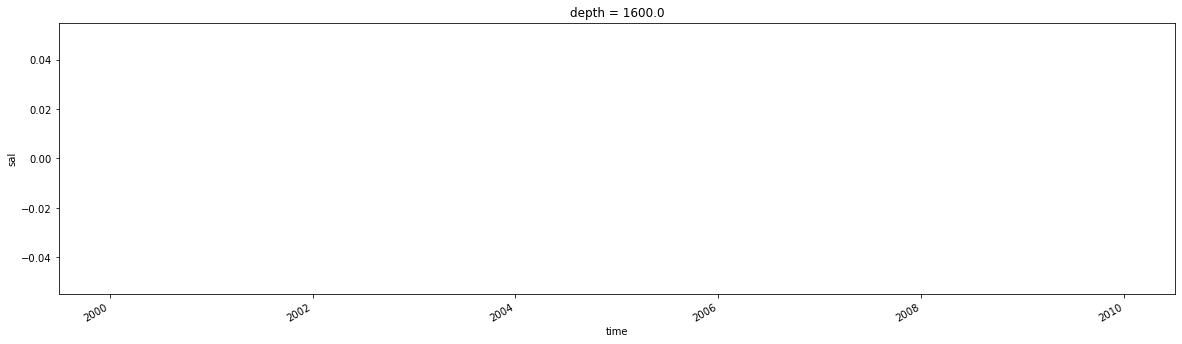

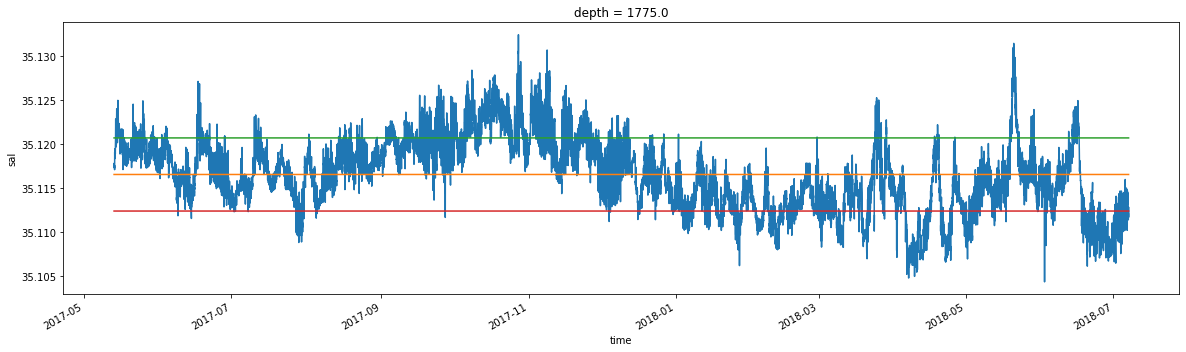

In [20]:
for n in depth_eb:
    dseb_17.sal.sel(depth=n).plot.line(x='time', figsize=(20,5));
    med_brd.sel(depth=n).plot.line(x='time');
    (med_brd+SA_std).sel(depth=n).plot.line(x='time');
    (med_brd-SA_std).sel(depth=n).plot.line(x='time');

## Salinity WB1 2016

In [21]:
SA_md = dswb1_16.sal.median('time')
SA_std = dswb1_16.sal.std('time')

sal, med_brd = xr.broadcast(dswb1_16.sal,SA_md)

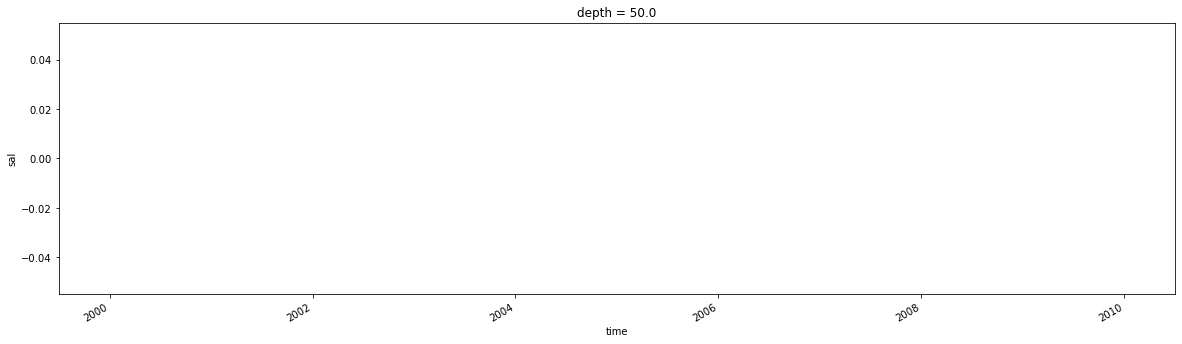

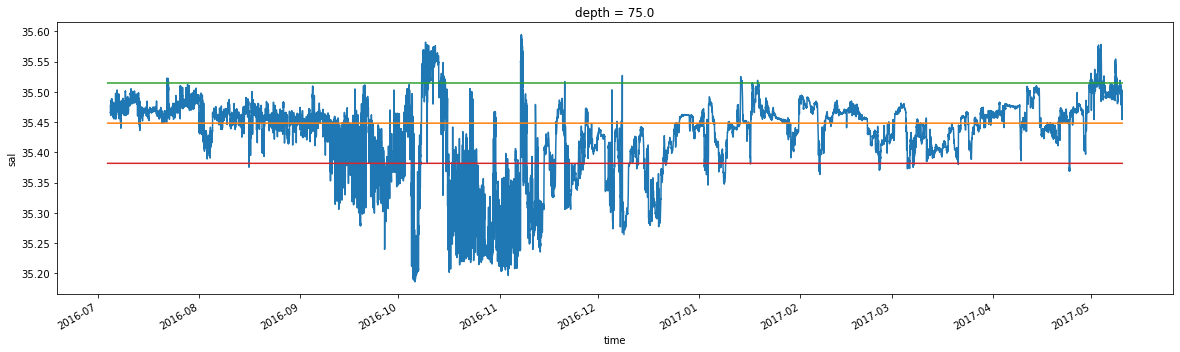

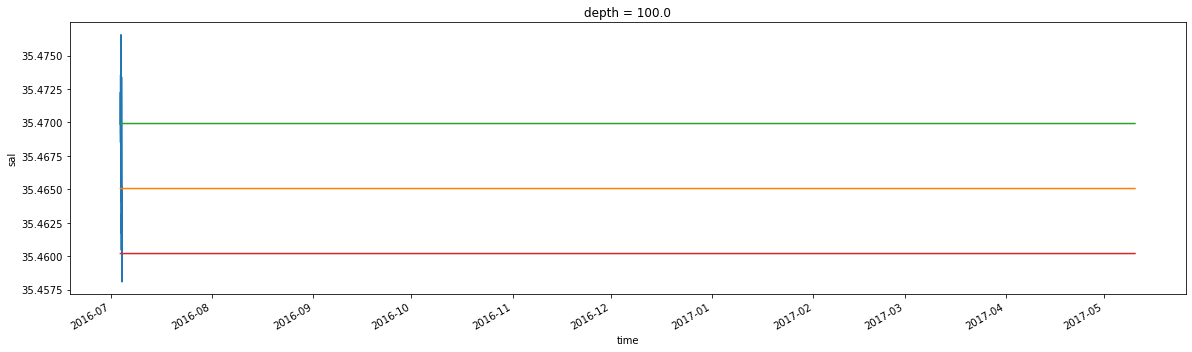

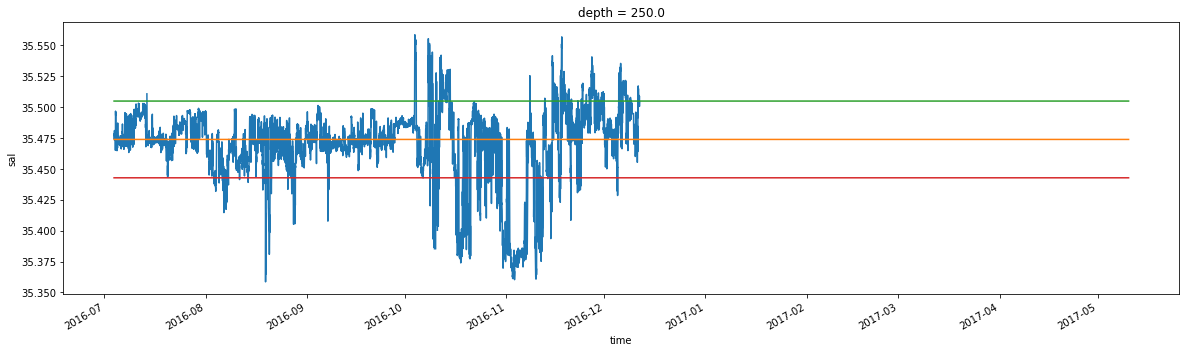

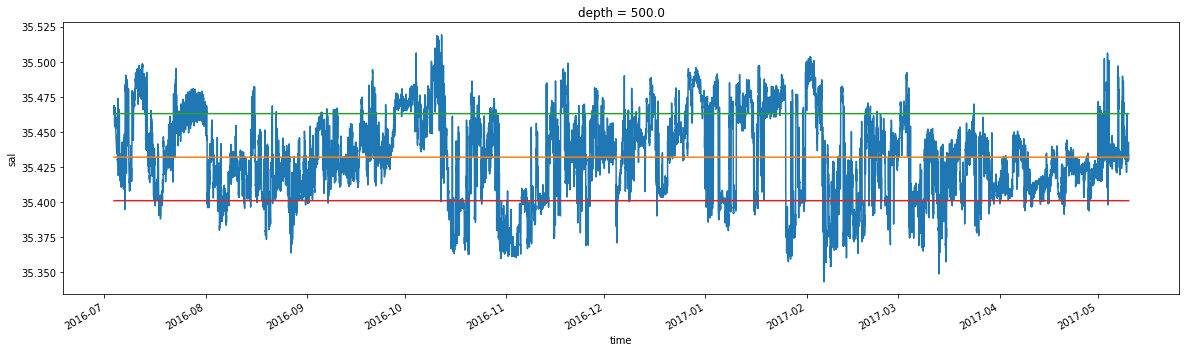

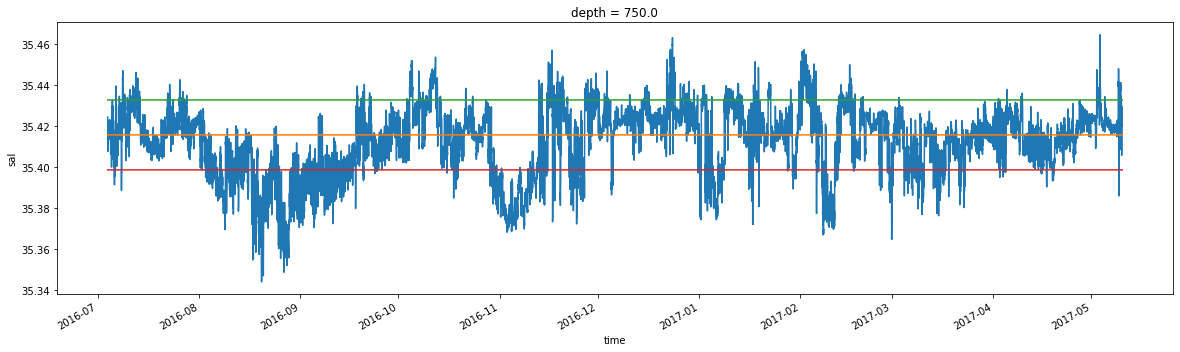

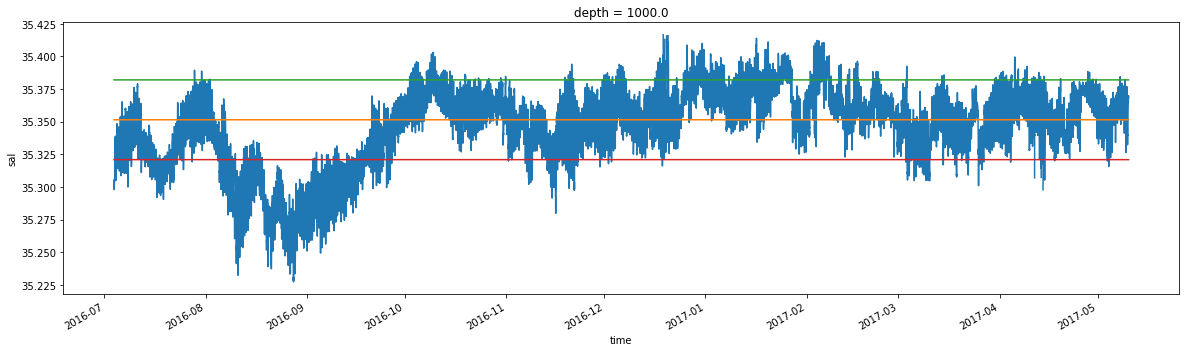

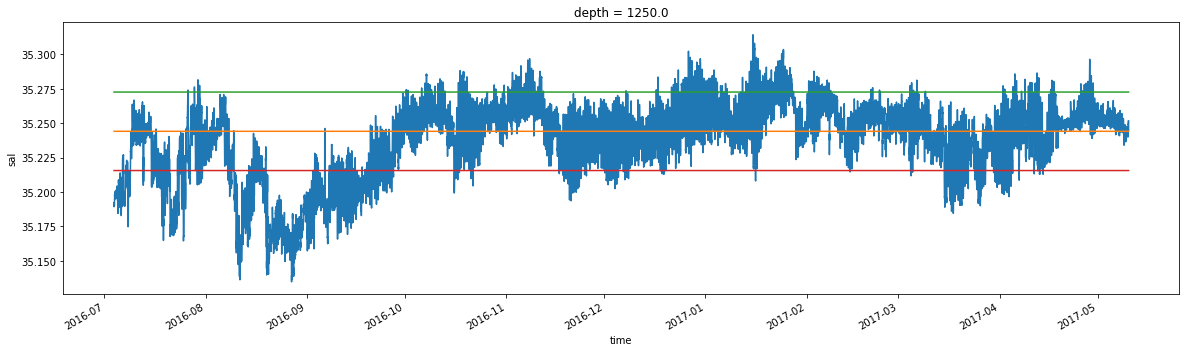

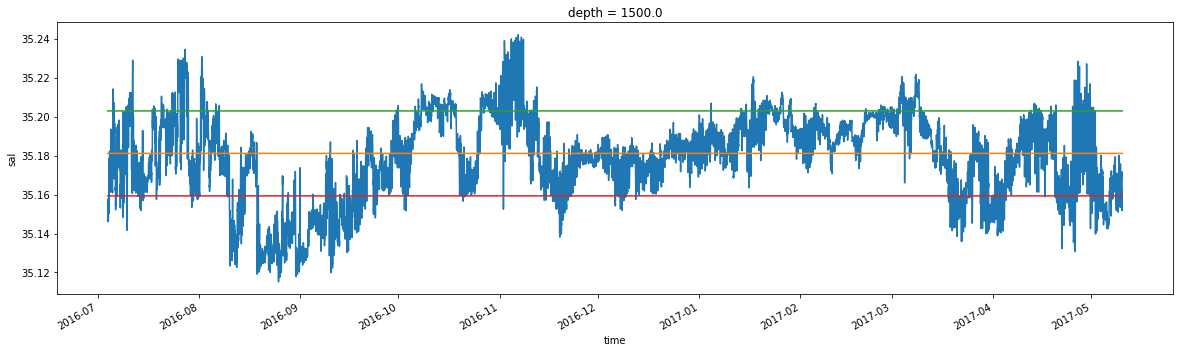

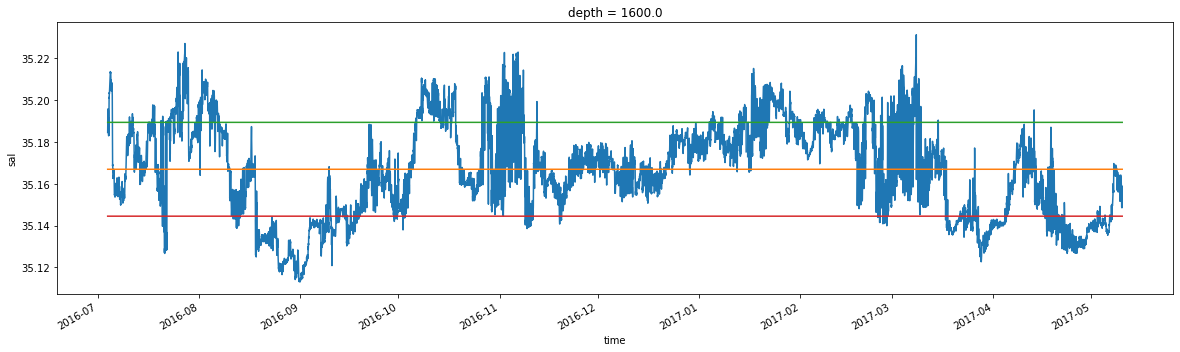

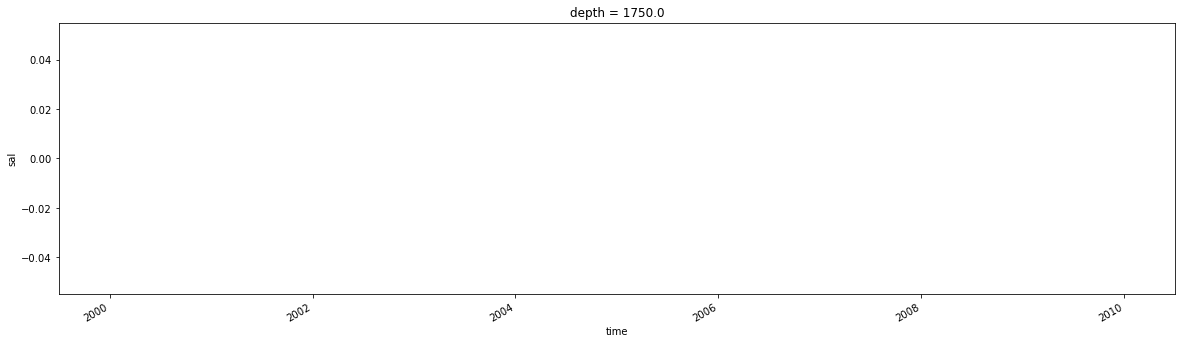

In [22]:
for n in depth_wb1:  
    dswb1_16.sal.sel(depth=n).plot.line(x='time', figsize=(20,5));
    med_brd.sel(depth=n).plot.line(x='time');
    (med_brd+SA_std).sel(depth=n).plot.line(x='time');
    (med_brd-SA_std).sel(depth=n).plot.line(x='time');

## Salinity WB2 2018

In [23]:
SA_md = dswb2_18.sal.median('time')
SA_std = dswb2_18.sal.std('time')

sal, med_brd = xr.broadcast(dswb2_18.sal,SA_md)

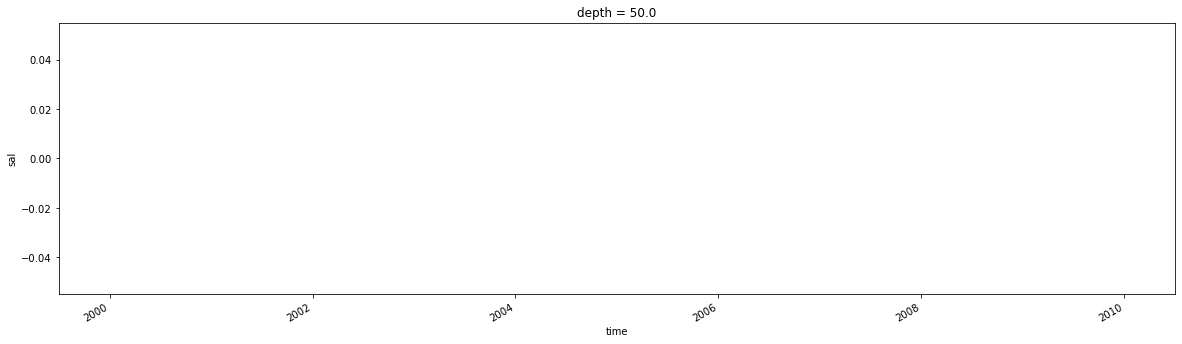

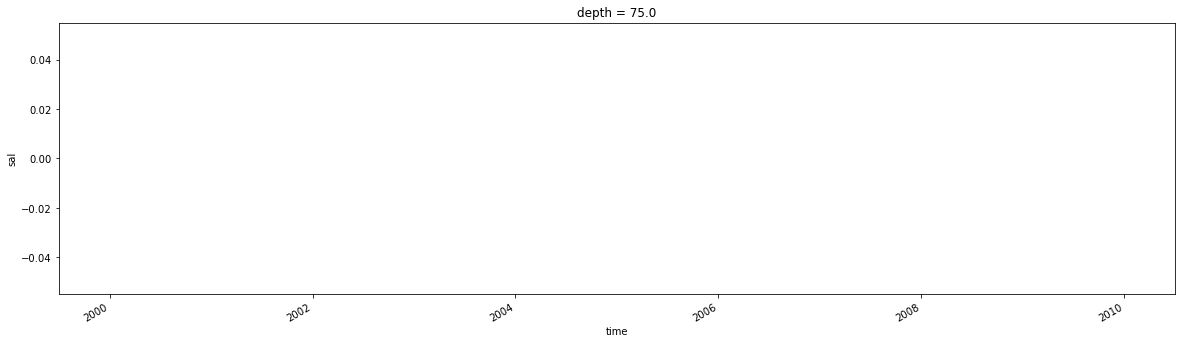

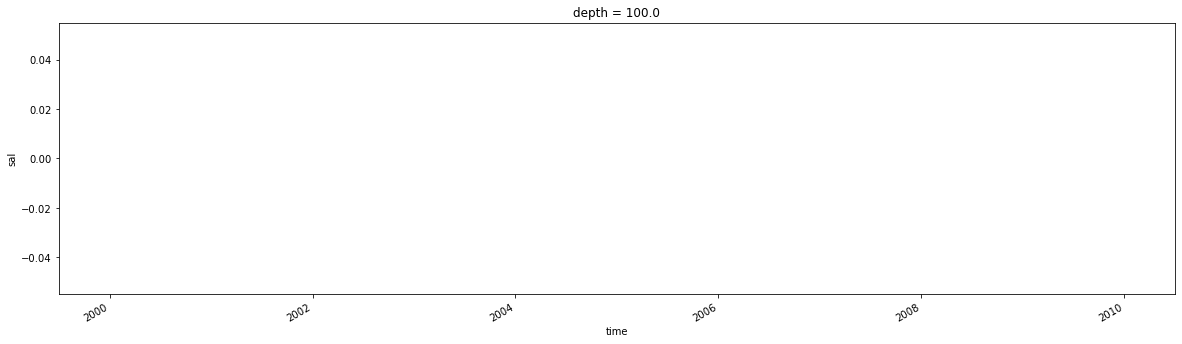

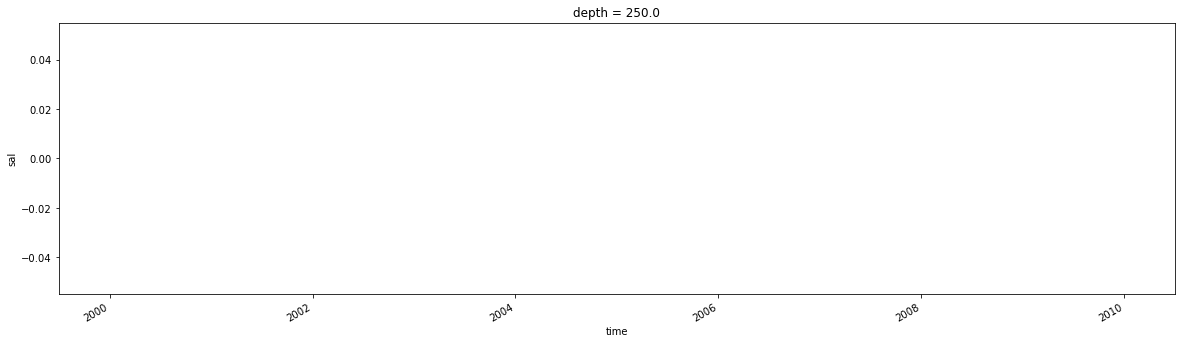

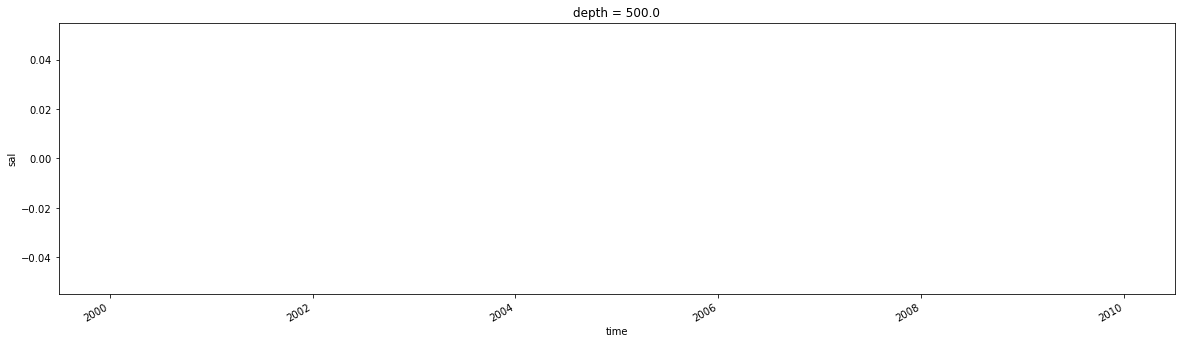

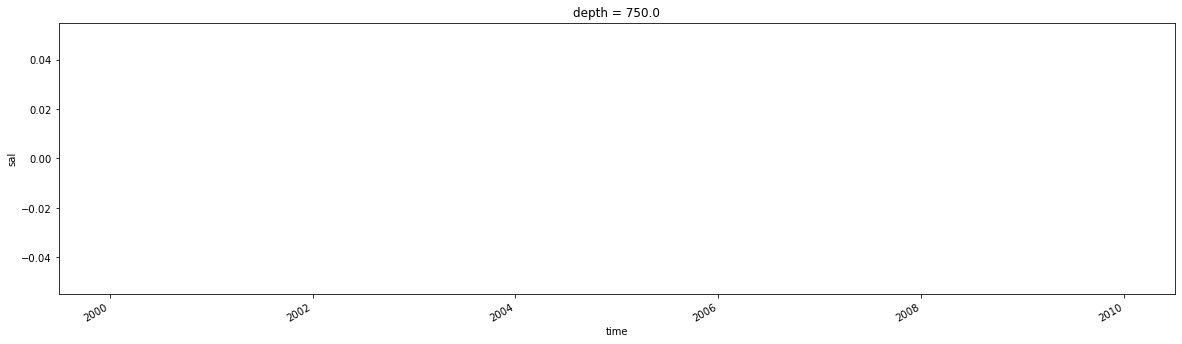

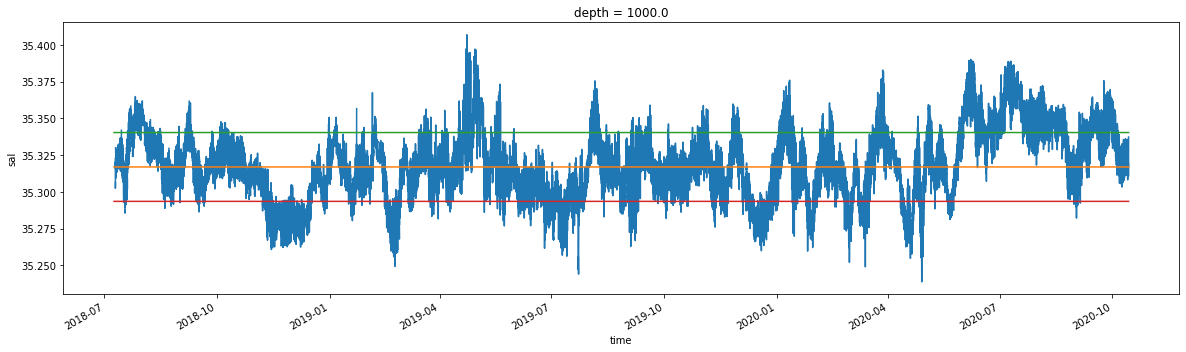

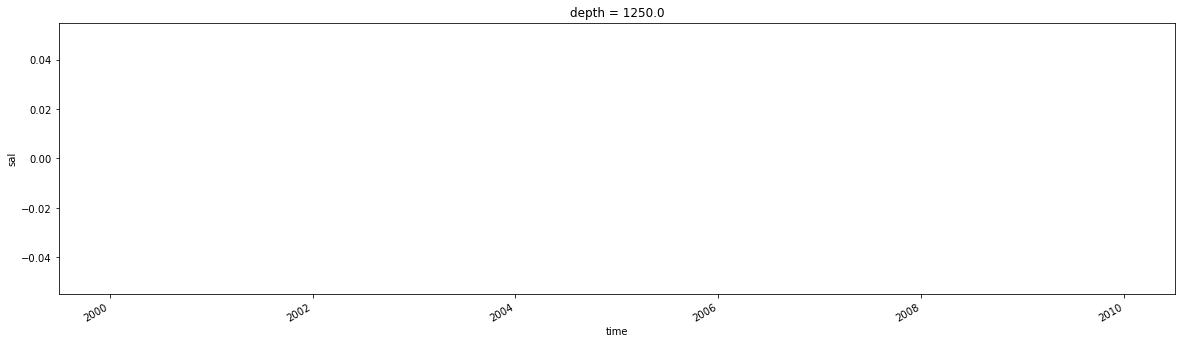

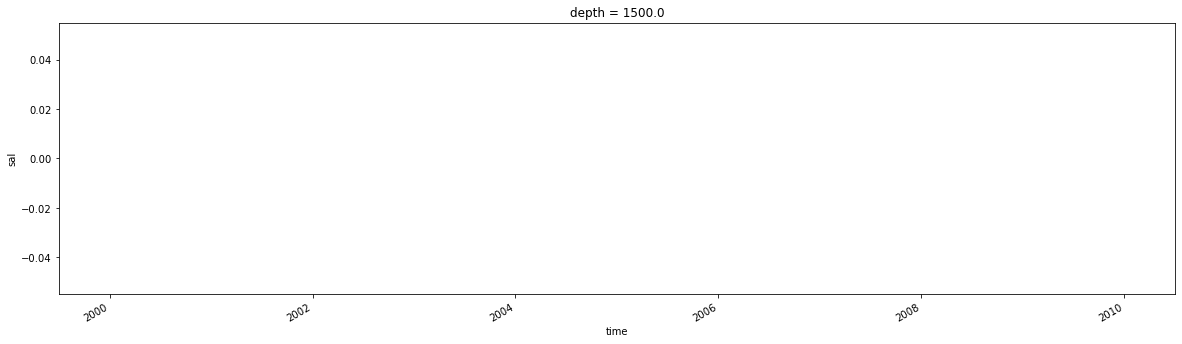

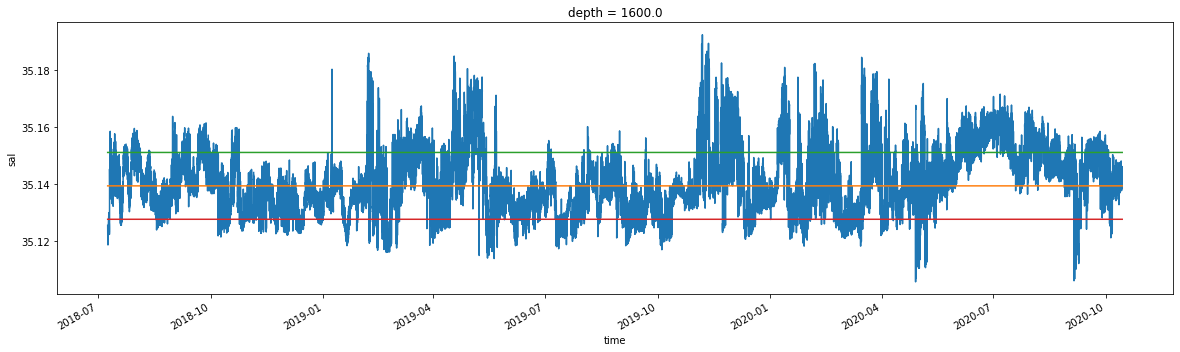

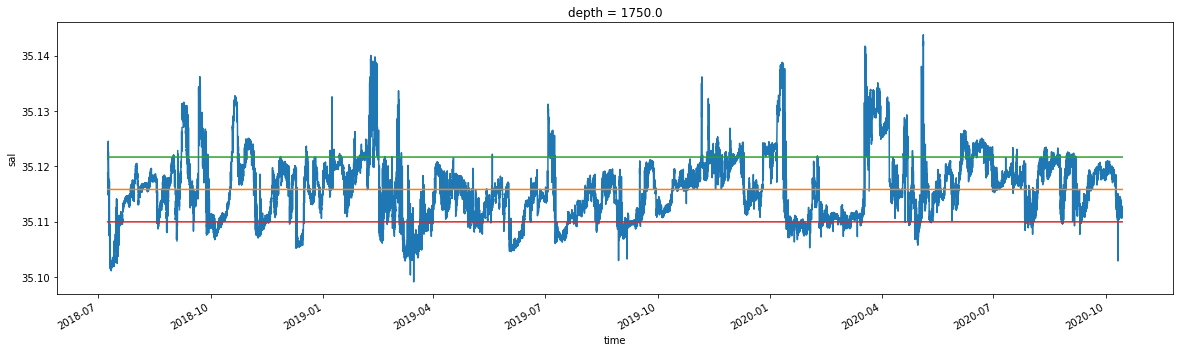

In [24]:
for n in depth_wb2:  
    dswb2_18.sal.sel(depth=n).plot.line(x='time', figsize=(20,5));
    med_brd.sel(depth=n).plot.line(x='time');
    (med_brd+SA_std).sel(depth=n).plot.line(x='time');
    (med_brd-SA_std).sel(depth=n).plot.line(x='time');